Nvidia GPU's = only GPU's that support **CUDA** = language + framework used to do deep learning

In [1]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
## remove dir if present already, re-clone fastai repo
!rm -r -f fastai
!git clone https://github.com/fastai/fastai.git

Cloning into 'fastai'...
remote: Counting objects: 4822, done.
remote: Total 4822 (delta 0), reused 0 (delta 0), pack-reused 4821
Receiving objects: 100% (4822/4822), 189.70 MiB | 35.69 MiB/s, done.
Resolving deltas: 100% (3063/3063), done.


In [0]:
# make sure conda is up to date
#!conda env update

In [4]:
!cd fastai | ls
# make sure fastai is up to date
#! git pull

data  datalab  dogscats.zip  fastai


In [0]:
%matplotlib inline

In [6]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch or torchvision so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl | pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


## Image Classification w/ **Convolutional Neural Networks (CNN)**

### Dogs v. Cats

Will try to enter Dogs v. Cats on Kaggle: 25k labelled photos available for training, 12.5k in test set. At time of competition launch (2013), state of the art = 80% accuracy.

In [7]:
# fixed imread error
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install --no-cache-dir -I pillow
import PIL._imaging

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
    100% |████████████████████████████████| 2.0MB 6.3MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
import sys

# get to directory with .py files
sys.path.insert(0, './fastai/fastai/')

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [9]:
## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-05-10 23:14:52--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip         94%[=================>  ] 772.68M  21.2MB/s    eta 3s     

dogscats.zip        100%[===================>] 817.50M  23.3MB/s    in 53s     

2018-05-10 23:15:46 (15.3 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogs


  inflating: data/dogscats/train/cats/cat.7432.jpg  
  inflating: data/dogscats/train/cats/cat.2666.jpg  
  inflating: data/dogscats/train/cats/cat.6438.jpg  
  inflating: data/dogscats/train/cats/cat.8130.jpg  
  inflating: data/dogscats/train/cats/cat.2529.jpg  
  inflating: data/dogscats/train/cats/cat.12003.jpg  
  inflating: data/dogscats/train/cats/cat.161.jpg  
  inflating: data/dogscats/train/cats/cat.4222.jpg  
  inflating: data/dogscats/train/cats/cat.11188.jpg  
  inflating: data/dogscats/train/cats/cat.9287.jpg  
  inflating: data/dogscats/train/cats/cat.5740.jpg  
  inflating: data/dogscats/train/cats/cat.2422.jpg  
  inflating: data/dogscats/train/cats/cat.4952.jpg  
  inflating: data/dogscats/train/cats/cat.12296.jpg  
  inflating: data/dogscats/train/cats/cat.5807.jpg  
  inflating: data/dogscats/train/cats/cat.11176.jpg  
  inflating: data/dogscats/train/cats/cat.6809.jpg  
  inflating: data/dogscats/train/cats/cat.181.jpg  
  inflating: data/dogscats/train/cats/cat.1

  inflating: data/dogscats/train/cats/cat.5710.jpg  
  inflating: data/dogscats/train/cats/cat.9298.jpg  
  inflating: data/dogscats/train/cats/cat.10172.jpg  
  inflating: data/dogscats/train/cats/cat.12288.jpg  
  inflating: data/dogscats/train/cats/cat.3071.jpg  
  inflating: data/dogscats/train/cats/cat.1099.jpg  
  inflating: data/dogscats/train/cats/cat.1660.jpg  
  inflating: data/dogscats/train/cats/cat.1119.jpg  
  inflating: data/dogscats/train/cats/cat.8781.jpg  
  inflating: data/dogscats/train/cats/cat.8669.jpg  
  inflating: data/dogscats/train/cats/cat.3454.jpg  
  inflating: data/dogscats/train/cats/cat.5016.jpg  
  inflating: data/dogscats/train/cats/cat.5418.jpg  
  inflating: data/dogscats/train/cats/cat.2470.jpg  
  inflating: data/dogscats/train/cats/cat.4922.jpg  
  inflating: data/dogscats/train/cats/cat.10603.jpg  
  inflating: data/dogscats/train/cats/cat.7197.jpg  
  inflating: data/dogscats/train/cats/cat.5217.jpg  
  inflating: data/dogscats/train/cats/cat.8


  inflating: data/dogscats/train/cats/cat.7095.jpg  
  inflating: data/dogscats/train/cats/cat.8016.jpg  
  inflating: data/dogscats/train/cats/cat.1782.jpg  
  inflating: data/dogscats/train/cats/cat.6534.jpg  
  inflating: data/dogscats/train/cats/cat.11077.jpg  
  inflating: data/dogscats/train/cats/cat.11638.jpg  
  inflating: data/dogscats/train/cats/cat.6233.jpg  
  inflating: data/dogscats/train/cats/cat.8202.jpg  
  inflating: data/dogscats/train/cats/cat.9776.jpg  
  inflating: data/dogscats/train/cats/cat.1825.jpg  
  inflating: data/dogscats/train/cats/cat.10850.jpg  
  inflating: data/dogscats/train/cats/cat.9405.jpg  
  inflating: data/dogscats/train/cats/cat.3520.jpg  
  inflating: data/dogscats/train/cats/cat.10707.jpg  
  inflating: data/dogscats/train/cats/cat.4132.jpg  
  inflating: data/dogscats/train/cats/cat.10508.jpg  
  inflating: data/dogscats/train/cats/cat.3033.jpg  
  inflating: data/dogscats/train/cats/cat.10922.jpg  
  inflating: data/dogscats/train/cats/c

  inflating: data/dogscats/train/cats/cat.5872.jpg  
  inflating: data/dogscats/train/cats/cat.11159.jpg  
  inflating: data/dogscats/train/cats/cat.1021.jpg  
  inflating: data/dogscats/train/cats/cat.10605.jpg  
  inflating: data/dogscats/train/cats/cat.10326.jpg  
  inflating: data/dogscats/train/cats/cat.7337.jpg  
  inflating: data/dogscats/train/cats/cat.9649.jpg  
  inflating: data/dogscats/train/cats/cat.5534.jpg  
  inflating: data/dogscats/train/cats/cat.530.jpg  
  inflating: data/dogscats/train/cats/cat.6527.jpg  
  inflating: data/dogscats/train/cats/cat.1549.jpg  
  inflating: data/dogscats/train/cats/cat.5869.jpg  
  inflating: data/dogscats/train/cats/cat.3087.jpg  
  inflating: data/dogscats/train/cats/cat.9433.jpg  
  inflating: data/dogscats/train/cats/cat.7152.jpg  
  inflating: data/dogscats/train/cats/cat.5938.jpg  
  inflating: data/dogscats/train/cats/cat.4459.jpg  
  inflating: data/dogscats/train/cats/cat.252.jpg  
  inflating: data/dogscats/train/cats/cat.590

  inflating: data/dogscats/train/cats/cat.2773.jpg  
  inflating: data/dogscats/train/cats/cat.5332.jpg  
  inflating: data/dogscats/train/cats/cat.2060.jpg  
  inflating: data/dogscats/train/cats/cat.1770.jpg  
  inflating: data/dogscats/train/cats/cat.11586.jpg  
  inflating: data/dogscats/train/cats/cat.6616.jpg  
  inflating: data/dogscats/train/cats/cat.6867.jpg  
  inflating: data/dogscats/train/cats/cat.6589.jpg  
  inflating: data/dogscats/train/cats/cat.12385.jpg  
  inflating: data/dogscats/train/cats/cat.5095.jpg  
  inflating: data/dogscats/train/cats/cat.548.jpg  
  inflating: data/dogscats/train/cats/cat.12292.jpg  
  inflating: data/dogscats/train/cats/cat.12057.jpg  
  inflating: data/dogscats/train/cats/cat.5207.jpg  
  inflating: data/dogscats/train/cats/cat.12310.jpg  
  inflating: data/dogscats/train/cats/cat.700.jpg  
  inflating: data/dogscats/train/cats/cat.7959.jpg  
  inflating: data/dogscats/train/cats/cat.6222.jpg  
  inflating: data/dogscats/train/cats/cat.1


  inflating: data/dogscats/train/cats/cat.3373.jpg  
  inflating: data/dogscats/train/cats/cat.4035.jpg  
  inflating: data/dogscats/train/cats/cat.3486.jpg  
  inflating: data/dogscats/train/cats/cat.7431.jpg  
  inflating: data/dogscats/train/cats/cat.12314.jpg  
  inflating: data/dogscats/train/cats/cat.9381.jpg  
  inflating: data/dogscats/train/cats/cat.4210.jpg  
  inflating: data/dogscats/train/cats/cat.175.jpg  
  inflating: data/dogscats/train/cats/cat.2601.jpg  
  inflating: data/dogscats/train/cats/cat.9694.jpg  
  inflating: data/dogscats/train/cats/cat.2716.jpg  
  inflating: data/dogscats/train/cats/cat.8500.jpg  
  inflating: data/dogscats/train/cats/cat.10340.jpg  
  inflating: data/dogscats/train/cats/cat.11656.jpg  
  inflating: data/dogscats/train/cats/cat.10499.jpg  
  inflating: data/dogscats/train/cats/cat.7638.jpg  
  inflating: data/dogscats/train/cats/cat.1186.jpg  
  inflating: data/dogscats/train/cats/cat.3288.jpg  
  inflating: data/dogscats/train/cats/cat.


  inflating: data/dogscats/train/cats/cat.2169.jpg  
  inflating: data/dogscats/train/cats/cat.11240.jpg  
  inflating: data/dogscats/train/cats/cat.4462.jpg  
  inflating: data/dogscats/train/cats/cat.8435.jpg  
  inflating: data/dogscats/train/cats/cat.7764.jpg  
  inflating: data/dogscats/train/cats/cat.1875.jpg  
  inflating: data/dogscats/train/cats/cat.1860.jpg  
  inflating: data/dogscats/train/cats/cat.793.jpg  
  inflating: data/dogscats/train/cats/cat.4660.jpg  
  inflating: data/dogscats/train/cats/cat.5492.jpg  
  inflating: data/dogscats/train/cats/cat.12235.jpg  
  inflating: data/dogscats/train/cats/cat.3589.jpg  
  inflating: data/dogscats/train/cats/cat.4296.jpg  
  inflating: data/dogscats/train/cats/cat.6968.jpg  
  inflating: data/dogscats/train/cats/cat.3346.jpg  
  inflating: data/dogscats/train/cats/cat.6640.jpg  
  inflating: data/dogscats/train/cats/cat.1236.jpg  
  inflating: data/dogscats/train/cats/cat.309.jpg  
  inflating: data/dogscats/train/cats/cat.671

  inflating: data/dogscats/train/cats/cat.12357.jpg  
  inflating: data/dogscats/train/cats/cat.2324.jpg  
  inflating: data/dogscats/train/cats/cat.9274.jpg  
  inflating: data/dogscats/train/cats/cat.1892.jpg  
  inflating: data/dogscats/train/cats/cat.4338.jpg  
  inflating: data/dogscats/train/cats/cat.9324.jpg  
  inflating: data/dogscats/train/cats/cat.8365.jpg  
  inflating: data/dogscats/train/cats/cat.8607.jpg  
  inflating: data/dogscats/train/cats/cat.48.jpg  
  inflating: data/dogscats/train/cats/cat.11588.jpg  
  inflating: data/dogscats/train/cats/cat.2910.jpg  
  inflating: data/dogscats/train/cats/cat.3776.jpg  
  inflating: data/dogscats/train/cats/cat.5818.jpg  
  inflating: data/dogscats/train/cats/cat.1303.jpg  
  inflating: data/dogscats/train/cats/cat.4667.jpg  
  inflating: data/dogscats/train/cats/cat.5820.jpg  
  inflating: data/dogscats/train/cats/cat.12497.jpg  
  inflating: data/dogscats/train/cats/cat.12161.jpg  
  inflating: data/dogscats/train/cats/cat.10


  inflating: data/dogscats/train/cats/cat.4007.jpg  
  inflating: data/dogscats/train/cats/cat.8158.jpg  
  inflating: data/dogscats/train/cats/cat.11653.jpg  
  inflating: data/dogscats/train/cats/cat.7684.jpg  
  inflating: data/dogscats/train/cats/cat.1813.jpg  
  inflating: data/dogscats/train/cats/cat.4614.jpg  
  inflating: data/dogscats/train/cats/cat.3978.jpg  
  inflating: data/dogscats/train/cats/cat.3202.jpg  
  inflating: data/dogscats/train/cats/cat.3573.jpg  
  inflating: data/dogscats/train/cats/cat.2898.jpg  
  inflating: data/dogscats/train/cats/cat.7708.jpg  
  inflating: data/dogscats/train/cats/cat.6181.jpg  
  inflating: data/dogscats/train/cats/cat.4969.jpg  
  inflating: data/dogscats/train/cats/cat.3813.jpg  
  inflating: data/dogscats/train/cats/cat.2067.jpg  
  inflating: data/dogscats/train/cats/cat.3316.jpg  
  inflating: data/dogscats/train/cats/cat.408.jpg  
  inflating: data/dogscats/train/cats/cat.415.jpg  
  inflating: data/dogscats/train/cats/cat.5261


  inflating: data/dogscats/train/cats/cat.5683.jpg  
  inflating: data/dogscats/train/cats/cat.997.jpg  
  inflating: data/dogscats/train/cats/cat.1733.jpg  
  inflating: data/dogscats/train/cats/cat.1079.jpg  
  inflating: data/dogscats/train/cats/cat.11108.jpg  
  inflating: data/dogscats/train/cats/cat.2846.jpg  
  inflating: data/dogscats/train/cats/cat.7466.jpg  
  inflating: data/dogscats/train/cats/cat.11181.jpg  
  inflating: data/dogscats/train/cats/cat.1334.jpg  
  inflating: data/dogscats/train/cats/cat.5070.jpg  
  inflating: data/dogscats/train/cats/cat.11368.jpg  
  inflating: data/dogscats/train/cats/cat.5231.jpg  
  inflating: data/dogscats/train/cats/cat.524.jpg  
  inflating: data/dogscats/train/cats/cat.2611.jpg  
  inflating: data/dogscats/train/cats/cat.717.jpg  
  inflating: data/dogscats/train/cats/cat.9970.jpg  
  inflating: data/dogscats/train/cats/cat.1884.jpg  
  inflating: data/dogscats/train/cats/cat.11337.jpg  
  inflating: data/dogscats/train/cats/cat.72


  inflating: data/dogscats/train/cats/cat.9471.jpg  
  inflating: data/dogscats/train/cats/cat.5824.jpg  
  inflating: data/dogscats/train/cats/cat.10021.jpg  
  inflating: data/dogscats/train/cats/cat.10410.jpg  
  inflating: data/dogscats/train/cats/cat.4280.jpg  
  inflating: data/dogscats/train/cats/cat.296.jpg  
  inflating: data/dogscats/train/cats/cat.8191.jpg  
  inflating: data/dogscats/train/cats/cat.10798.jpg  
  inflating: data/dogscats/train/cats/cat.9558.jpg  
  inflating: data/dogscats/train/cats/cat.9301.jpg  
  inflating: data/dogscats/train/cats/cat.9032.jpg  
  inflating: data/dogscats/train/cats/cat.3619.jpg  
  inflating: data/dogscats/train/cats/cat.6872.jpg  
  inflating: data/dogscats/train/cats/cat.6706.jpg  
  inflating: data/dogscats/train/cats/cat.4175.jpg  
  inflating: data/dogscats/train/cats/cat.4930.jpg  
  inflating: data/dogscats/train/cats/cat.612.jpg  
  inflating: data/dogscats/train/cats/cat.6306.jpg  
  inflating: data/dogscats/train/cats/cat.11


  inflating: data/dogscats/train/cats/cat.10024.jpg  
  inflating: data/dogscats/train/cats/cat.10950.jpg  
  inflating: data/dogscats/train/cats/cat.6100.jpg  
  inflating: data/dogscats/train/cats/cat.3882.jpg  
  inflating: data/dogscats/train/cats/cat.1553.jpg  
  inflating: data/dogscats/train/cats/cat.5698.jpg  
  inflating: data/dogscats/train/cats/cat.9463.jpg  
  inflating: data/dogscats/train/cats/cat.11180.jpg  
  inflating: data/dogscats/train/cats/cat.1341.jpg  
  inflating: data/dogscats/train/cats/cat.12208.jpg  
  inflating: data/dogscats/train/cats/cat.434.jpg  
  inflating: data/dogscats/train/cats/cat.2785.jpg  
  inflating: data/dogscats/train/cats/cat.11507.jpg  
  inflating: data/dogscats/train/cats/cat.6612.jpg  
  inflating: data/dogscats/train/cats/cat.3434.jpg  
  inflating: data/dogscats/train/cats/cat.1479.jpg  
  inflating: data/dogscats/train/cats/cat.11346.jpg  
  inflating: data/dogscats/train/cats/cat.3662.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.11968.jpg  
  inflating: data/dogscats/train/cats/cat.6281.jpg  
  inflating: data/dogscats/train/cats/cat.11753.jpg  
  inflating: data/dogscats/train/cats/cat.11772.jpg  
  inflating: data/dogscats/train/cats/cat.9753.jpg  
  inflating: data/dogscats/train/cats/cat.5627.jpg  
  inflating: data/dogscats/train/cats/cat.4596.jpg  
  inflating: data/dogscats/train/cats/cat.559.jpg  
  inflating: data/dogscats/train/cats/cat.10200.jpg  
  inflating: data/dogscats/train/cats/cat.6666.jpg  
  inflating: data/dogscats/train/cats/cat.2264.jpg  
  inflating: data/dogscats/train/cats/cat.7128.jpg  
  inflating: data/dogscats/train/cats/cat.7526.jpg  
  inflating: data/dogscats/train/cats/cat.5025.jpg  
  inflating: data/dogscats/train/cats/cat.377.jpg  
  inflating: data/dogscats/train/cats/cat.11167.jpg  
  inflating: data/dogscats/train/cats/cat.3075.jpg  
  inflating: data/dogscats/train/cats/cat.10523.jpg  
  inflating: data/dogscats/train/cats/cat.

  inflating: data/dogscats/train/cats/cat.1204.jpg  
  inflating: data/dogscats/train/cats/cat.2861.jpg  
  inflating: data/dogscats/train/cats/cat.11834.jpg  
  inflating: data/dogscats/train/cats/cat.5726.jpg  
  inflating: data/dogscats/train/cats/cat.6552.jpg  
  inflating: data/dogscats/train/cats/cat.418.jpg  
  inflating: data/dogscats/train/cats/cat.815.jpg  
  inflating: data/dogscats/train/cats/cat.9628.jpg  
  inflating: data/dogscats/train/cats/cat.4257.jpg  
  inflating: data/dogscats/train/cats/cat.6829.jpg  
  inflating: data/dogscats/train/cats/cat.2007.jpg  
  inflating: data/dogscats/train/cats/cat.1946.jpg  
  inflating: data/dogscats/train/cats/cat.784.jpg  
  inflating: data/dogscats/train/cats/cat.12192.jpg  
  inflating: data/dogscats/train/cats/cat.6404.jpg  
  inflating: data/dogscats/train/cats/cat.1959.jpg  
  inflating: data/dogscats/train/cats/cat.2313.jpg  
  inflating: data/dogscats/train/cats/cat.6229.jpg  
  inflating: data/dogscats/train/cats/cat.8628.

  inflating: data/dogscats/train/cats/cat.6304.jpg  
  inflating: data/dogscats/train/cats/cat.381.jpg  
  inflating: data/dogscats/train/cats/cat.1019.jpg  
  inflating: data/dogscats/train/cats/cat.12048.jpg  
  inflating: data/dogscats/train/cats/cat.7050.jpg  
  inflating: data/dogscats/train/cats/cat.4692.jpg  
  inflating: data/dogscats/train/cats/cat.8096.jpg  
  inflating: data/dogscats/train/cats/cat.4367.jpg  
  inflating: data/dogscats/train/cats/cat.11877.jpg  
  inflating: data/dogscats/train/cats/cat.3802.jpg  
  inflating: data/dogscats/train/cats/cat.5662.jpg  
  inflating: data/dogscats/train/cats/cat.8581.jpg  
  inflating: data/dogscats/train/cats/cat.686.jpg  
  inflating: data/dogscats/train/cats/cat.4716.jpg  
  inflating: data/dogscats/train/cats/cat.1485.jpg  
  inflating: data/dogscats/train/cats/cat.9159.jpg  
  inflating: data/dogscats/train/cats/cat.3225.jpg  
  inflating: data/dogscats/train/cats/cat.11570.jpg  
  inflating: data/dogscats/train/cats/cat.705


  inflating: data/dogscats/train/cats/cat.12150.jpg  
  inflating: data/dogscats/train/cats/cat.9110.jpg  
  inflating: data/dogscats/train/cats/cat.1144.jpg  
  inflating: data/dogscats/train/cats/cat.10440.jpg  
  inflating: data/dogscats/train/cats/cat.8676.jpg  
  inflating: data/dogscats/train/cats/cat.8360.jpg  
  inflating: data/dogscats/train/cats/cat.6043.jpg  
  inflating: data/dogscats/train/cats/cat.9764.jpg  
  inflating: data/dogscats/train/cats/cat.907.jpg  
  inflating: data/dogscats/train/cats/cat.4101.jpg  
  inflating: data/dogscats/train/cats/cat.9418.jpg  
  inflating: data/dogscats/train/cats/cat.1397.jpg  
  inflating: data/dogscats/train/cats/cat.3596.jpg  
  inflating: data/dogscats/train/cats/cat.9705.jpg  
  inflating: data/dogscats/train/cats/cat.6377.jpg  
  inflating: data/dogscats/train/cats/cat.5514.jpg  
  inflating: data/dogscats/train/cats/cat.5454.jpg  
  inflating: data/dogscats/train/cats/cat.4684.jpg  
  inflating: data/dogscats/train/cats/cat.98


  inflating: data/dogscats/train/cats/cat.156.jpg  
  inflating: data/dogscats/train/cats/cat.7998.jpg  
  inflating: data/dogscats/train/cats/cat.8733.jpg  
  inflating: data/dogscats/train/cats/cat.11757.jpg  
  inflating: data/dogscats/train/cats/cat.5734.jpg  
  inflating: data/dogscats/train/cats/cat.7543.jpg  
  inflating: data/dogscats/train/cats/cat.6740.jpg  
  inflating: data/dogscats/train/cats/cat.10476.jpg  
  inflating: data/dogscats/train/cats/cat.11886.jpg  
  inflating: data/dogscats/train/cats/cat.4412.jpg  
  inflating: data/dogscats/train/cats/cat.1361.jpg  
  inflating: data/dogscats/train/cats/cat.11415.jpg  
  inflating: data/dogscats/train/cats/cat.7640.jpg  
  inflating: data/dogscats/train/cats/cat.1954.jpg  
  inflating: data/dogscats/train/cats/cat.214.jpg  
  inflating: data/dogscats/train/cats/cat.886.jpg  
  inflating: data/dogscats/train/cats/cat.865.jpg  
  inflating: data/dogscats/train/cats/cat.11685.jpg  
  inflating: data/dogscats/train/cats/cat.10


  inflating: data/dogscats/train/cats/cat.2405.jpg  
  inflating: data/dogscats/train/cats/cat.7255.jpg  
  inflating: data/dogscats/train/cats/cat.8516.jpg  
  inflating: data/dogscats/train/cats/cat.10565.jpg  
  inflating: data/dogscats/train/cats/cat.9760.jpg  
  inflating: data/dogscats/train/cats/cat.10598.jpg  
  inflating: data/dogscats/train/cats/cat.12457.jpg  
  inflating: data/dogscats/train/cats/cat.6608.jpg  
  inflating: data/dogscats/train/cats/cat.11155.jpg  
  inflating: data/dogscats/train/cats/cat.9901.jpg  
  inflating: data/dogscats/train/cats/cat.1215.jpg  
  inflating: data/dogscats/train/cats/cat.9948.jpg  
  inflating: data/dogscats/train/cats/cat.2367.jpg  
  inflating: data/dogscats/train/cats/cat.2183.jpg  
  inflating: data/dogscats/train/cats/cat.7582.jpg  
  inflating: data/dogscats/train/cats/cat.285.jpg  
  inflating: data/dogscats/train/cats/cat.3961.jpg  
  inflating: data/dogscats/train/cats/cat.2481.jpg  
  inflating: data/dogscats/train/cats/cat.

  inflating: data/dogscats/train/cats/cat.3700.jpg  
  inflating: data/dogscats/train/cats/cat.1343.jpg  
  inflating: data/dogscats/train/cats/cat.7355.jpg  
  inflating: data/dogscats/train/cats/cat.9516.jpg  
  inflating: data/dogscats/train/cats/cat.9020.jpg  
  inflating: data/dogscats/train/cats/cat.8069.jpg  
  inflating: data/dogscats/train/cats/cat.9238.jpg  
  inflating: data/dogscats/train/cats/cat.3535.jpg  
  inflating: data/dogscats/train/cats/cat.7995.jpg  
  inflating: data/dogscats/train/cats/cat.12464.jpg  
  inflating: data/dogscats/train/cats/cat.8854.jpg  
  inflating: data/dogscats/train/cats/cat.7106.jpg  
  inflating: data/dogscats/train/cats/cat.6444.jpg  
  inflating: data/dogscats/train/cats/cat.2246.jpg  
  inflating: data/dogscats/train/cats/cat.10833.jpg  
  inflating: data/dogscats/train/cats/cat.290.jpg  
  inflating: data/dogscats/train/cats/cat.22.jpg  
  inflating: data/dogscats/train/cats/cat.93.jpg  
  inflating: data/dogscats/train/cats/cat.7988.jp


  inflating: data/dogscats/train/dogs/dog.7237.jpg  
  inflating: data/dogscats/train/dogs/dog.9542.jpg  
  inflating: data/dogscats/train/dogs/dog.6185.jpg  
  inflating: data/dogscats/train/dogs/dog.6560.jpg  
  inflating: data/dogscats/train/dogs/dog.9031.jpg  
  inflating: data/dogscats/train/dogs/dog.3917.jpg  
  inflating: data/dogscats/train/dogs/dog.5760.jpg  
  inflating: data/dogscats/train/dogs/dog.482.jpg  
  inflating: data/dogscats/train/dogs/dog.2160.jpg  
  inflating: data/dogscats/train/dogs/dog.5238.jpg  
  inflating: data/dogscats/train/dogs/dog.6916.jpg  
  inflating: data/dogscats/train/dogs/dog.7719.jpg  
  inflating: data/dogscats/train/dogs/dog.3190.jpg  
  inflating: data/dogscats/train/dogs/dog.7001.jpg  
  inflating: data/dogscats/train/dogs/dog.3602.jpg  
  inflating: data/dogscats/train/dogs/dog.4066.jpg  
  inflating: data/dogscats/train/dogs/dog.3562.jpg  
  inflating: data/dogscats/train/dogs/dog.1726.jpg  
  inflating: data/dogscats/train/dogs/dog.9897


  inflating: data/dogscats/train/dogs/dog.8354.jpg  
  inflating: data/dogscats/train/dogs/dog.10361.jpg  
  inflating: data/dogscats/train/dogs/dog.7288.jpg  
  inflating: data/dogscats/train/dogs/dog.8190.jpg  
  inflating: data/dogscats/train/dogs/dog.4065.jpg  
  inflating: data/dogscats/train/dogs/dog.4701.jpg  
  inflating: data/dogscats/train/dogs/dog.4064.jpg  
  inflating: data/dogscats/train/dogs/dog.9214.jpg  
  inflating: data/dogscats/train/dogs/dog.8630.jpg  
  inflating: data/dogscats/train/dogs/dog.3546.jpg  
  inflating: data/dogscats/train/dogs/dog.3706.jpg  
  inflating: data/dogscats/train/dogs/dog.1697.jpg  
  inflating: data/dogscats/train/dogs/dog.871.jpg  
  inflating: data/dogscats/train/dogs/dog.8771.jpg  
  inflating: data/dogscats/train/dogs/dog.2352.jpg  
  inflating: data/dogscats/train/dogs/dog.9166.jpg  
  inflating: data/dogscats/train/dogs/dog.4778.jpg  
  inflating: data/dogscats/train/dogs/dog.1117.jpg  
  inflating: data/dogscats/train/dogs/dog.810


  inflating: data/dogscats/train/dogs/dog.9612.jpg  
  inflating: data/dogscats/train/dogs/dog.6520.jpg  
  inflating: data/dogscats/train/dogs/dog.3878.jpg  
  inflating: data/dogscats/train/dogs/dog.1826.jpg  
  inflating: data/dogscats/train/dogs/dog.9693.jpg  
  inflating: data/dogscats/train/dogs/dog.3346.jpg  
  inflating: data/dogscats/train/dogs/dog.11.jpg  
  inflating: data/dogscats/train/dogs/dog.2660.jpg  
  inflating: data/dogscats/train/dogs/dog.3173.jpg  
  inflating: data/dogscats/train/dogs/dog.6873.jpg  
  inflating: data/dogscats/train/dogs/dog.5993.jpg  
  inflating: data/dogscats/train/dogs/dog.8018.jpg  
  inflating: data/dogscats/train/dogs/dog.10310.jpg  
  inflating: data/dogscats/train/dogs/dog.4672.jpg  
  inflating: data/dogscats/train/dogs/dog.8082.jpg  
  inflating: data/dogscats/train/dogs/dog.2580.jpg  
  inflating: data/dogscats/train/dogs/dog.11594.jpg  
  inflating: data/dogscats/train/dogs/dog.9061.jpg  
  inflating: data/dogscats/train/dogs/dog.109

  inflating: data/dogscats/train/dogs/dog.9045.jpg  
  inflating: data/dogscats/train/dogs/dog.6228.jpg  
  inflating: data/dogscats/train/dogs/dog.3134.jpg  
  inflating: data/dogscats/train/dogs/dog.9109.jpg  
  inflating: data/dogscats/train/dogs/dog.6077.jpg  
  inflating: data/dogscats/train/dogs/dog.7603.jpg  
  inflating: data/dogscats/train/dogs/dog.2492.jpg  
  inflating: data/dogscats/train/dogs/dog.4693.jpg  
  inflating: data/dogscats/train/dogs/dog.8271.jpg  
  inflating: data/dogscats/train/dogs/dog.11968.jpg  
  inflating: data/dogscats/train/dogs/dog.11599.jpg  
  inflating: data/dogscats/train/dogs/dog.11438.jpg  
  inflating: data/dogscats/train/dogs/dog.4994.jpg  
  inflating: data/dogscats/train/dogs/dog.7159.jpg  
  inflating: data/dogscats/train/dogs/dog.5165.jpg  
  inflating: data/dogscats/train/dogs/dog.5556.jpg  
  inflating: data/dogscats/train/dogs/dog.10756.jpg  
  inflating: data/dogscats/train/dogs/dog.12207.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.8000.jpg  
  inflating: data/dogscats/train/dogs/dog.3977.jpg  
  inflating: data/dogscats/train/dogs/dog.4136.jpg  
  inflating: data/dogscats/train/dogs/dog.9978.jpg  
  inflating: data/dogscats/train/dogs/dog.5815.jpg  
  inflating: data/dogscats/train/dogs/dog.10092.jpg  
  inflating: data/dogscats/train/dogs/dog.323.jpg  
  inflating: data/dogscats/train/dogs/dog.9887.jpg  
  inflating: data/dogscats/train/dogs/dog.8861.jpg  
  inflating: data/dogscats/train/dogs/dog.9979.jpg  
  inflating: data/dogscats/train/dogs/dog.6484.jpg  
  inflating: data/dogscats/train/dogs/dog.3956.jpg  
  inflating: data/dogscats/train/dogs/dog.8201.jpg  
  inflating: data/dogscats/train/dogs/dog.539.jpg  
  inflating: data/dogscats/train/dogs/dog.7184.jpg  
  inflating: data/dogscats/train/dogs/dog.8768.jpg  
  inflating: data/dogscats/train/dogs/dog.1506.jpg  
  inflating: data/dogscats/train/dogs/dog.6009.jpg  
  inflating: data/dogscats/train/dogs/dog.1112

  inflating: data/dogscats/train/dogs/dog.5834.jpg  
  inflating: data/dogscats/train/dogs/dog.2486.jpg  
  inflating: data/dogscats/train/dogs/dog.8994.jpg  
  inflating: data/dogscats/train/dogs/dog.8119.jpg  
  inflating: data/dogscats/train/dogs/dog.3453.jpg  
  inflating: data/dogscats/train/dogs/dog.497.jpg  
  inflating: data/dogscats/train/dogs/dog.11604.jpg  
  inflating: data/dogscats/train/dogs/dog.2777.jpg  
  inflating: data/dogscats/train/dogs/dog.10383.jpg  
  inflating: data/dogscats/train/dogs/dog.5226.jpg  
  inflating: data/dogscats/train/dogs/dog.4305.jpg  
  inflating: data/dogscats/train/dogs/dog.12154.jpg  
  inflating: data/dogscats/train/dogs/dog.11060.jpg  
  inflating: data/dogscats/train/dogs/dog.8071.jpg  
  inflating: data/dogscats/train/dogs/dog.2510.jpg  
  inflating: data/dogscats/train/dogs/dog.7639.jpg  
  inflating: data/dogscats/train/dogs/dog.12164.jpg  
  inflating: data/dogscats/train/dogs/dog.12389.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.11530.jpg  
  inflating: data/dogscats/train/dogs/dog.11761.jpg  
  inflating: data/dogscats/train/dogs/dog.10028.jpg  
  inflating: data/dogscats/train/dogs/dog.3289.jpg  
  inflating: data/dogscats/train/dogs/dog.9475.jpg  
  inflating: data/dogscats/train/dogs/dog.5070.jpg  
  inflating: data/dogscats/train/dogs/dog.6398.jpg  
  inflating: data/dogscats/train/dogs/dog.6827.jpg  
  inflating: data/dogscats/train/dogs/dog.10928.jpg  
  inflating: data/dogscats/train/dogs/dog.9499.jpg  
  inflating: data/dogscats/train/dogs/dog.5808.jpg  
  inflating: data/dogscats/train/dogs/dog.1067.jpg  
  inflating: data/dogscats/train/dogs/dog.1702.jpg  
  inflating: data/dogscats/train/dogs/dog.1940.jpg  
  inflating: data/dogscats/train/dogs/dog.5462.jpg  
  inflating: data/dogscats/train/dogs/dog.11011.jpg  
  inflating: data/dogscats/train/dogs/dog.11947.jpg  
  inflating: data/dogscats/train/dogs/dog.6429.jpg  
  inflating: data/dogscats/train/dogs/do

  inflating: data/dogscats/train/dogs/dog.6551.jpg  
  inflating: data/dogscats/train/dogs/dog.7098.jpg  
  inflating: data/dogscats/train/dogs/dog.7416.jpg  
  inflating: data/dogscats/train/dogs/dog.2827.jpg  
  inflating: data/dogscats/train/dogs/dog.11571.jpg  
  inflating: data/dogscats/train/dogs/dog.3646.jpg  
  inflating: data/dogscats/train/dogs/dog.7299.jpg  
  inflating: data/dogscats/train/dogs/dog.1294.jpg  
  inflating: data/dogscats/train/dogs/dog.758.jpg  
  inflating: data/dogscats/train/dogs/dog.8595.jpg  
  inflating: data/dogscats/train/dogs/dog.6555.jpg  
  inflating: data/dogscats/train/dogs/dog.4826.jpg  
  inflating: data/dogscats/train/dogs/dog.10176.jpg  
  inflating: data/dogscats/train/dogs/dog.4497.jpg  
  inflating: data/dogscats/train/dogs/dog.1441.jpg  
  inflating: data/dogscats/train/dogs/dog.715.jpg  
  inflating: data/dogscats/train/dogs/dog.10502.jpg  
  inflating: data/dogscats/train/dogs/dog.9609.jpg  
  inflating: data/dogscats/train/dogs/dog.104

  inflating: data/dogscats/train/dogs/dog.4044.jpg  
  inflating: data/dogscats/train/dogs/dog.2993.jpg  
  inflating: data/dogscats/train/dogs/dog.11886.jpg  
  inflating: data/dogscats/train/dogs/dog.10266.jpg  
  inflating: data/dogscats/train/dogs/dog.7800.jpg  
  inflating: data/dogscats/train/dogs/dog.12254.jpg  
  inflating: data/dogscats/train/dogs/dog.8313.jpg  
  inflating: data/dogscats/train/dogs/dog.10476.jpg  
  inflating: data/dogscats/train/dogs/dog.1584.jpg  
  inflating: data/dogscats/train/dogs/dog.11194.jpg  
  inflating: data/dogscats/train/dogs/dog.2816.jpg  
  inflating: data/dogscats/train/dogs/dog.10981.jpg  
  inflating: data/dogscats/train/dogs/dog.3427.jpg  
  inflating: data/dogscats/train/dogs/dog.3497.jpg  
  inflating: data/dogscats/train/dogs/dog.7972.jpg  
  inflating: data/dogscats/train/dogs/dog.1481.jpg  
  inflating: data/dogscats/train/dogs/dog.8239.jpg  
  inflating: data/dogscats/train/dogs/dog.550.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.2230.jpg  
  inflating: data/dogscats/train/dogs/dog.2683.jpg  
  inflating: data/dogscats/train/dogs/dog.7528.jpg  
  inflating: data/dogscats/train/dogs/dog.9818.jpg  
  inflating: data/dogscats/train/dogs/dog.8210.jpg  
  inflating: data/dogscats/train/dogs/dog.1545.jpg  
  inflating: data/dogscats/train/dogs/dog.7868.jpg  
  inflating: data/dogscats/train/dogs/dog.1229.jpg  
  inflating: data/dogscats/train/dogs/dog.314.jpg  
  inflating: data/dogscats/train/dogs/dog.1178.jpg  
  inflating: data/dogscats/train/dogs/dog.1598.jpg  
  inflating: data/dogscats/train/dogs/dog.11848.jpg  
  inflating: data/dogscats/train/dogs/dog.1071.jpg  
  inflating: data/dogscats/train/dogs/dog.6690.jpg  
  inflating: data/dogscats/train/dogs/dog.2269.jpg  
  inflating: data/dogscats/train/dogs/dog.11219.jpg  
  inflating: data/dogscats/train/dogs/dog.11900.jpg  
  inflating: data/dogscats/train/dogs/dog.6725.jpg  
  inflating: data/dogscats/train/dogs/dog.89

  inflating: data/dogscats/train/dogs/dog.5457.jpg  
  inflating: data/dogscats/train/dogs/dog.6755.jpg  
  inflating: data/dogscats/train/dogs/dog.11357.jpg  
  inflating: data/dogscats/train/dogs/dog.1900.jpg  
  inflating: data/dogscats/train/dogs/dog.944.jpg  
  inflating: data/dogscats/train/dogs/dog.9772.jpg  
  inflating: data/dogscats/train/dogs/dog.12143.jpg  
  inflating: data/dogscats/train/dogs/dog.5876.jpg  
  inflating: data/dogscats/train/dogs/dog.11517.jpg  
  inflating: data/dogscats/train/dogs/dog.6376.jpg  
  inflating: data/dogscats/train/dogs/dog.11188.jpg  
  inflating: data/dogscats/train/dogs/dog.10158.jpg  
  inflating: data/dogscats/train/dogs/dog.9982.jpg  
  inflating: data/dogscats/train/dogs/dog.6516.jpg  
  inflating: data/dogscats/train/dogs/dog.8349.jpg  
  inflating: data/dogscats/train/dogs/dog.2332.jpg  
  inflating: data/dogscats/train/dogs/dog.9891.jpg  
  inflating: data/dogscats/train/dogs/dog.8941.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.1453.jpg  
  inflating: data/dogscats/train/dogs/dog.7124.jpg  
  inflating: data/dogscats/train/dogs/dog.9209.jpg  
  inflating: data/dogscats/train/dogs/dog.10930.jpg  
  inflating: data/dogscats/train/dogs/dog.12061.jpg  
  inflating: data/dogscats/train/dogs/dog.10192.jpg  
  inflating: data/dogscats/train/dogs/dog.2646.jpg  
  inflating: data/dogscats/train/dogs/dog.12313.jpg  
  inflating: data/dogscats/train/dogs/dog.4158.jpg  
  inflating: data/dogscats/train/dogs/dog.4776.jpg  
  inflating: data/dogscats/train/dogs/dog.3253.jpg  
  inflating: data/dogscats/train/dogs/dog.1430.jpg  
  inflating: data/dogscats/train/dogs/dog.1252.jpg  
  inflating: data/dogscats/train/dogs/dog.5955.jpg  
  inflating: data/dogscats/train/dogs/dog.2116.jpg  
  inflating: data/dogscats/train/dogs/dog.4051.jpg  
  inflating: data/dogscats/train/dogs/dog.997.jpg  
  inflating: data/dogscats/train/dogs/dog.12054.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.506.jpg  
  inflating: data/dogscats/train/dogs/dog.4323.jpg  
  inflating: data/dogscats/train/dogs/dog.12089.jpg  
  inflating: data/dogscats/train/dogs/dog.2715.jpg  
  inflating: data/dogscats/train/dogs/dog.10443.jpg  
  inflating: data/dogscats/train/dogs/dog.2746.jpg  
  inflating: data/dogscats/train/dogs/dog.9633.jpg  
  inflating: data/dogscats/train/dogs/dog.8886.jpg  
  inflating: data/dogscats/train/dogs/dog.6752.jpg  
  inflating: data/dogscats/train/dogs/dog.2863.jpg  
  inflating: data/dogscats/train/dogs/dog.331.jpg  
  inflating: data/dogscats/train/dogs/dog.3230.jpg  
  inflating: data/dogscats/train/dogs/dog.8602.jpg  
  inflating: data/dogscats/train/dogs/dog.4549.jpg  
  inflating: data/dogscats/train/dogs/dog.4904.jpg  
  inflating: data/dogscats/train/dogs/dog.9925.jpg  
  inflating: data/dogscats/train/dogs/dog.6082.jpg  
  inflating: data/dogscats/train/dogs/dog.7527.jpg  
  inflating: data/dogscats/train/dogs/dog.5621


  inflating: data/dogscats/train/dogs/dog.7333.jpg  
  inflating: data/dogscats/train/dogs/dog.798.jpg  
  inflating: data/dogscats/train/dogs/dog.222.jpg  
  inflating: data/dogscats/train/dogs/dog.5570.jpg  
  inflating: data/dogscats/train/dogs/dog.12163.jpg  
  inflating: data/dogscats/train/dogs/dog.4684.jpg  
  inflating: data/dogscats/train/dogs/dog.7223.jpg  
  inflating: data/dogscats/train/dogs/dog.10956.jpg  
  inflating: data/dogscats/train/dogs/dog.1260.jpg  
  inflating: data/dogscats/train/dogs/dog.2855.jpg  
  inflating: data/dogscats/train/dogs/dog.6596.jpg  
  inflating: data/dogscats/train/dogs/dog.4006.jpg  
  inflating: data/dogscats/train/dogs/dog.3159.jpg  
  inflating: data/dogscats/train/dogs/dog.2661.jpg  
  inflating: data/dogscats/train/dogs/dog.598.jpg  
  inflating: data/dogscats/train/dogs/dog.12141.jpg  
  inflating: data/dogscats/train/dogs/dog.11106.jpg  
  inflating: data/dogscats/train/dogs/dog.8362.jpg  
  inflating: data/dogscats/train/dogs/dog.23


  inflating: data/dogscats/train/dogs/dog.2731.jpg  
  inflating: data/dogscats/train/dogs/dog.154.jpg  
  inflating: data/dogscats/train/dogs/dog.5428.jpg  
  inflating: data/dogscats/train/dogs/dog.2091.jpg  
  inflating: data/dogscats/train/dogs/dog.7264.jpg  
  inflating: data/dogscats/train/dogs/dog.6244.jpg  
  inflating: data/dogscats/train/dogs/dog.8487.jpg  
  inflating: data/dogscats/train/dogs/dog.2668.jpg  
  inflating: data/dogscats/train/dogs/dog.8341.jpg  
  inflating: data/dogscats/train/dogs/dog.9376.jpg  
  inflating: data/dogscats/train/dogs/dog.4937.jpg  
  inflating: data/dogscats/train/dogs/dog.7663.jpg  
  inflating: data/dogscats/train/dogs/dog.205.jpg  
  inflating: data/dogscats/train/dogs/dog.8900.jpg  
  inflating: data/dogscats/train/dogs/dog.3566.jpg  
  inflating: data/dogscats/train/dogs/dog.7699.jpg  
  inflating: data/dogscats/train/dogs/dog.4232.jpg  
  inflating: data/dogscats/train/dogs/dog.7691.jpg  
  inflating: data/dogscats/train/dogs/dog.1353.


  inflating: data/dogscats/train/dogs/dog.6623.jpg  
  inflating: data/dogscats/train/dogs/dog.10017.jpg  
  inflating: data/dogscats/train/dogs/dog.1015.jpg  
  inflating: data/dogscats/train/dogs/dog.12029.jpg  
  inflating: data/dogscats/train/dogs/dog.12046.jpg  
  inflating: data/dogscats/train/dogs/dog.4421.jpg  
  inflating: data/dogscats/train/dogs/dog.7185.jpg  
  inflating: data/dogscats/train/dogs/dog.3631.jpg  
  inflating: data/dogscats/train/dogs/dog.7128.jpg  
  inflating: data/dogscats/train/dogs/dog.7947.jpg  
  inflating: data/dogscats/train/dogs/dog.11792.jpg  
  inflating: data/dogscats/train/dogs/dog.9930.jpg  
  inflating: data/dogscats/train/dogs/dog.10915.jpg  
  inflating: data/dogscats/train/dogs/dog.3752.jpg  
  inflating: data/dogscats/train/dogs/dog.10448.jpg  
  inflating: data/dogscats/train/dogs/dog.5154.jpg  
  inflating: data/dogscats/train/dogs/dog.4764.jpg  
  inflating: data/dogscats/train/dogs/dog.8847.jpg  
  inflating: data/dogscats/train/dogs/d

  inflating: data/dogscats/train/dogs/dog.5311.jpg  
  inflating: data/dogscats/train/dogs/dog.5734.jpg  
  inflating: data/dogscats/train/dogs/dog.4499.jpg  
  inflating: data/dogscats/train/dogs/dog.546.jpg  
  inflating: data/dogscats/train/dogs/dog.7614.jpg  
  inflating: data/dogscats/train/dogs/dog.619.jpg  
  inflating: data/dogscats/train/dogs/dog.554.jpg  
  inflating: data/dogscats/train/dogs/dog.3547.jpg  
  inflating: data/dogscats/train/dogs/dog.11221.jpg  
  inflating: data/dogscats/train/dogs/dog.9581.jpg  
  inflating: data/dogscats/train/dogs/dog.4682.jpg  
  inflating: data/dogscats/train/dogs/dog.11853.jpg  
  inflating: data/dogscats/train/dogs/dog.3423.jpg  
  inflating: data/dogscats/train/dogs/dog.7048.jpg  
  inflating: data/dogscats/train/dogs/dog.4027.jpg  
  inflating: data/dogscats/train/dogs/dog.5994.jpg  
  inflating: data/dogscats/train/dogs/dog.12136.jpg  
  inflating: data/dogscats/train/dogs/dog.755.jpg  
  inflating: data/dogscats/train/dogs/dog.12355


  inflating: data/dogscats/train/dogs/dog.8014.jpg  
  inflating: data/dogscats/train/dogs/dog.228.jpg  
  inflating: data/dogscats/train/dogs/dog.8833.jpg  
  inflating: data/dogscats/train/dogs/dog.7660.jpg  
  inflating: data/dogscats/train/dogs/dog.1078.jpg  
  inflating: data/dogscats/train/dogs/dog.8568.jpg  
  inflating: data/dogscats/train/dogs/dog.5813.jpg  
  inflating: data/dogscats/train/dogs/dog.8423.jpg  
  inflating: data/dogscats/train/dogs/dog.9070.jpg  
  inflating: data/dogscats/train/dogs/dog.160.jpg  
  inflating: data/dogscats/train/dogs/dog.3470.jpg  
  inflating: data/dogscats/train/dogs/dog.350.jpg  
  inflating: data/dogscats/train/dogs/dog.1975.jpg  
  inflating: data/dogscats/train/dogs/dog.1499.jpg  
  inflating: data/dogscats/train/dogs/dog.4495.jpg  
  inflating: data/dogscats/train/dogs/dog.7430.jpg  
  inflating: data/dogscats/train/dogs/dog.4627.jpg  
  inflating: data/dogscats/train/dogs/dog.1576.jpg  
  inflating: data/dogscats/train/dogs/dog.23.jpg


  inflating: data/dogscats/train/dogs/dog.9076.jpg  
  inflating: data/dogscats/train/dogs/dog.11264.jpg  
  inflating: data/dogscats/train/dogs/dog.5197.jpg  
  inflating: data/dogscats/train/dogs/dog.596.jpg  
  inflating: data/dogscats/train/dogs/dog.7173.jpg  
  inflating: data/dogscats/train/dogs/dog.7500.jpg  
  inflating: data/dogscats/train/dogs/dog.12082.jpg  
  inflating: data/dogscats/train/dogs/dog.4435.jpg  
  inflating: data/dogscats/train/dogs/dog.6431.jpg  
  inflating: data/dogscats/train/dogs/dog.11790.jpg  
  inflating: data/dogscats/train/dogs/dog.1363.jpg  
  inflating: data/dogscats/train/dogs/dog.8708.jpg  
  inflating: data/dogscats/train/dogs/dog.9697.jpg  
  inflating: data/dogscats/train/dogs/dog.11330.jpg  
  inflating: data/dogscats/train/dogs/dog.1604.jpg  
  inflating: data/dogscats/train/dogs/dog.11600.jpg  
  inflating: data/dogscats/train/dogs/dog.7872.jpg  
  inflating: data/dogscats/train/dogs/dog.8213.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.5471.jpg  
  inflating: data/dogscats/train/dogs/dog.3916.jpg  
  inflating: data/dogscats/train/dogs/dog.1461.jpg  
  inflating: data/dogscats/train/dogs/dog.10544.jpg  
  inflating: data/dogscats/train/dogs/dog.11386.jpg  
  inflating: data/dogscats/train/dogs/dog.10539.jpg  
  inflating: data/dogscats/train/dogs/dog.11806.jpg  
  inflating: data/dogscats/train/dogs/dog.3655.jpg  
  inflating: data/dogscats/train/dogs/dog.1632.jpg  
  inflating: data/dogscats/train/dogs/dog.1922.jpg  
  inflating: data/dogscats/train/dogs/dog.10653.jpg  
  inflating: data/dogscats/train/dogs/dog.11649.jpg  
  inflating: data/dogscats/train/dogs/dog.7136.jpg  
  inflating: data/dogscats/train/dogs/dog.3929.jpg  
  inflating: data/dogscats/train/dogs/dog.306.jpg  
  inflating: data/dogscats/train/dogs/dog.960.jpg  
  inflating: data/dogscats/train/dogs/dog.8645.jpg  
  inflating: data/dogscats/train/dogs/dog.3363.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.2874.jpg  
  inflating: data/dogscats/train/dogs/dog.11784.jpg  
  inflating: data/dogscats/train/dogs/dog.11310.jpg  
  inflating: data/dogscats/train/dogs/dog.10428.jpg  
  inflating: data/dogscats/train/dogs/dog.8388.jpg  
  inflating: data/dogscats/train/dogs/dog.189.jpg  
  inflating: data/dogscats/train/dogs/dog.8894.jpg  
  inflating: data/dogscats/train/dogs/dog.6663.jpg  
  inflating: data/dogscats/train/dogs/dog.7227.jpg  
  inflating: data/dogscats/train/dogs/dog.9051.jpg  
  inflating: data/dogscats/train/dogs/dog.5270.jpg  
  inflating: data/dogscats/train/dogs/dog.1459.jpg  
  inflating: data/dogscats/train/dogs/dog.1929.jpg  
  inflating: data/dogscats/train/dogs/dog.911.jpg  
  inflating: data/dogscats/train/dogs/dog.269.jpg  
  inflating: data/dogscats/train/dogs/dog.7668.jpg  
  inflating: data/dogscats/train/dogs/dog.11510.jpg  
  inflating: data/dogscats/train/dogs/dog.7671.jpg  
  inflating: data/dogscats/train/dogs/dog.11


  inflating: data/dogscats/valid/cats/cat.3653.jpg  
  inflating: data/dogscats/valid/cats/cat.1889.jpg  
  inflating: data/dogscats/valid/cats/cat.7923.jpg  
  inflating: data/dogscats/valid/cats/cat.10811.jpg  
  inflating: data/dogscats/valid/cats/cat.7248.jpg  
  inflating: data/dogscats/valid/cats/cat.2128.jpg  
  inflating: data/dogscats/valid/cats/cat.12095.jpg  
  inflating: data/dogscats/valid/cats/cat.7121.jpg  
  inflating: data/dogscats/valid/cats/cat.1136.jpg  
  inflating: data/dogscats/valid/cats/cat.7681.jpg  
  inflating: data/dogscats/valid/cats/cat.8381.jpg  
  inflating: data/dogscats/valid/cats/cat.6372.jpg  
  inflating: data/dogscats/valid/cats/cat.9468.jpg  
  inflating: data/dogscats/valid/cats/cat.4752.jpg  
  inflating: data/dogscats/valid/cats/cat.2950.jpg  
  inflating: data/dogscats/valid/cats/cat.11395.jpg  
  inflating: data/dogscats/valid/cats/cat.9100.jpg  
  inflating: data/dogscats/valid/cats/cat.5973.jpg  
  inflating: data/dogscats/valid/cats/cat.


  inflating: data/dogscats/valid/cats/cat.4282.jpg  
  inflating: data/dogscats/valid/cats/cat.3652.jpg  
  inflating: data/dogscats/valid/cats/cat.9357.jpg  
  inflating: data/dogscats/valid/cats/cat.11981.jpg  
  inflating: data/dogscats/valid/cats/cat.3375.jpg  
  inflating: data/dogscats/valid/cats/cat.3049.jpg  
  inflating: data/dogscats/valid/cats/cat.8741.jpg  
  inflating: data/dogscats/valid/cats/cat.6606.jpg  
  inflating: data/dogscats/valid/cats/cat.1841.jpg  
  inflating: data/dogscats/valid/cats/cat.2410.jpg  
  inflating: data/dogscats/valid/cats/cat.7492.jpg  
  inflating: data/dogscats/valid/cats/cat.3565.jpg  
  inflating: data/dogscats/valid/cats/cat.5074.jpg  
  inflating: data/dogscats/valid/cats/cat.1305.jpg  
  inflating: data/dogscats/valid/cats/cat.4517.jpg  
  inflating: data/dogscats/valid/cats/cat.10667.jpg  
  inflating: data/dogscats/valid/cats/cat.11178.jpg  
  inflating: data/dogscats/valid/cats/cat.9411.jpg  
  inflating: data/dogscats/valid/cats/cat.


  inflating: data/dogscats/valid/dogs/dog.900.jpg  
  inflating: data/dogscats/valid/dogs/dog.10282.jpg  
  inflating: data/dogscats/valid/dogs/dog.4912.jpg  
  inflating: data/dogscats/valid/dogs/dog.8332.jpg  
  inflating: data/dogscats/valid/dogs/dog.11054.jpg  
  inflating: data/dogscats/valid/dogs/dog.2064.jpg  
  inflating: data/dogscats/valid/dogs/dog.1566.jpg  
  inflating: data/dogscats/valid/dogs/dog.10814.jpg  
  inflating: data/dogscats/valid/dogs/dog.4815.jpg  
  inflating: data/dogscats/valid/dogs/dog.7413.jpg  
  inflating: data/dogscats/valid/dogs/dog.8494.jpg  
  inflating: data/dogscats/valid/dogs/dog.7886.jpg  
  inflating: data/dogscats/valid/dogs/dog.3031.jpg  
  inflating: data/dogscats/valid/dogs/dog.12201.jpg  
  inflating: data/dogscats/valid/dogs/dog.12213.jpg  
  inflating: data/dogscats/valid/dogs/dog.7716.jpg  
  inflating: data/dogscats/valid/dogs/dog.9873.jpg  
  inflating: data/dogscats/valid/dogs/dog.10365.jpg  
  inflating: data/dogscats/valid/dogs/do


  inflating: data/dogscats/valid/dogs/dog.3260.jpg  
  inflating: data/dogscats/valid/dogs/dog.2537.jpg  
  inflating: data/dogscats/valid/dogs/dog.1081.jpg  
  inflating: data/dogscats/valid/dogs/dog.7605.jpg  
  inflating: data/dogscats/valid/dogs/dog.4202.jpg  
  inflating: data/dogscats/valid/dogs/dog.9669.jpg  
  inflating: data/dogscats/valid/dogs/dog.11265.jpg  
  inflating: data/dogscats/valid/dogs/dog.258.jpg  
  inflating: data/dogscats/valid/dogs/dog.10301.jpg  
  inflating: data/dogscats/valid/dogs/dog.4240.jpg  
  inflating: data/dogscats/valid/dogs/dog.5366.jpg  
   creating: data/dogscats/models/
   creating: data/dogscats/test1/
  inflating: data/dogscats/test1/1930.jpg  
  inflating: data/dogscats/test1/10712.jpg  
  inflating: data/dogscats/test1/6831.jpg  
  inflating: data/dogscats/test1/12325.jpg  
  inflating: data/dogscats/test1/4240.jpg  
  inflating: data/dogscats/test1/5608.jpg  
  inflating: data/dogscats/test1/4670.jpg  
  inflating: data/dogscats/test1/255


  inflating: data/dogscats/test1/7978.jpg  
  inflating: data/dogscats/test1/5962.jpg  
  inflating: data/dogscats/test1/689.jpg  
  inflating: data/dogscats/test1/9260.jpg  
  inflating: data/dogscats/test1/1061.jpg  
  inflating: data/dogscats/test1/4601.jpg  
  inflating: data/dogscats/test1/842.jpg  
  inflating: data/dogscats/test1/5892.jpg  
  inflating: data/dogscats/test1/5421.jpg  
  inflating: data/dogscats/test1/4360.jpg  
  inflating: data/dogscats/test1/3868.jpg  
  inflating: data/dogscats/test1/1146.jpg  
  inflating: data/dogscats/test1/1703.jpg  
  inflating: data/dogscats/test1/8378.jpg  
  inflating: data/dogscats/test1/12067.jpg  
  inflating: data/dogscats/test1/2559.jpg  
  inflating: data/dogscats/test1/10578.jpg  
  inflating: data/dogscats/test1/10120.jpg  
  inflating: data/dogscats/test1/7563.jpg  
  inflating: data/dogscats/test1/11085.jpg  
  inflating: data/dogscats/test1/5676.jpg  
  inflating: data/dogscats/test1/2528.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/2662.jpg  
  inflating: data/dogscats/test1/2980.jpg  
  inflating: data/dogscats/test1/5134.jpg  
  inflating: data/dogscats/test1/11291.jpg  
  inflating: data/dogscats/test1/9061.jpg  
  inflating: data/dogscats/test1/6103.jpg  
  inflating: data/dogscats/test1/834.jpg  
  inflating: data/dogscats/test1/4446.jpg  
  inflating: data/dogscats/test1/2570.jpg  
  inflating: data/dogscats/test1/806.jpg  
  inflating: data/dogscats/test1/5380.jpg  
  inflating: data/dogscats/test1/2595.jpg  
  inflating: data/dogscats/test1/805.jpg  
  inflating: data/dogscats/test1/11955.jpg  
  inflating: data/dogscats/test1/7848.jpg  
  inflating: data/dogscats/test1/6376.jpg  
  inflating: data/dogscats/test1/6488.jpg  
  inflating: data/dogscats/test1/7455.jpg  
  inflating: data/dogscats/test1/4998.jpg  
  inflating: data/dogscats/test1/7203.jpg  
  inflating: data/dogscats/test1/11370.jpg  
  inflating: data/dogscats/test1/7141.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/5004.jpg  
  inflating: data/dogscats/test1/11567.jpg  
  inflating: data/dogscats/test1/9784.jpg  
  inflating: data/dogscats/test1/10393.jpg  
  inflating: data/dogscats/test1/6851.jpg  
  inflating: data/dogscats/test1/8029.jpg  
  inflating: data/dogscats/test1/5773.jpg  
  inflating: data/dogscats/test1/10137.jpg  
  inflating: data/dogscats/test1/8949.jpg  
  inflating: data/dogscats/test1/4751.jpg  
  inflating: data/dogscats/test1/5886.jpg  
  inflating: data/dogscats/test1/1987.jpg  
  inflating: data/dogscats/test1/10680.jpg  
  inflating: data/dogscats/test1/9902.jpg  
  inflating: data/dogscats/test1/2739.jpg  
  inflating: data/dogscats/test1/137.jpg  
  inflating: data/dogscats/test1/7728.jpg  
  inflating: data/dogscats/test1/2126.jpg  
  inflating: data/dogscats/test1/5784.jpg  
  inflating: data/dogscats/test1/6016.jpg  
  inflating: data/dogscats/test1/3490.jpg  
  inflating: data/dogscats/test1/10428.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/7778.jpg  
  inflating: data/dogscats/test1/11538.jpg  
  inflating: data/dogscats/test1/11873.jpg  
  inflating: data/dogscats/test1/2994.jpg  
  inflating: data/dogscats/test1/6312.jpg  
  inflating: data/dogscats/test1/5455.jpg  
  inflating: data/dogscats/test1/11364.jpg  
  inflating: data/dogscats/test1/4342.jpg  
  inflating: data/dogscats/test1/1678.jpg  
  inflating: data/dogscats/test1/3560.jpg  
  inflating: data/dogscats/test1/10032.jpg  
  inflating: data/dogscats/test1/10948.jpg  
  inflating: data/dogscats/test1/6865.jpg  
  inflating: data/dogscats/test1/11522.jpg  
  inflating: data/dogscats/test1/5108.jpg  
  inflating: data/dogscats/test1/404.jpg  
  inflating: data/dogscats/test1/1218.jpg  
  inflating: data/dogscats/test1/168.jpg  
  inflating: data/dogscats/test1/9788.jpg  
  inflating: data/dogscats/test1/12177.jpg  
  inflating: data/dogscats/test1/3627.jpg  
  inflating: data/dogscats/test1/6422.jpg  
  inflating: data/dogscats

  inflating: data/dogscats/test1/8783.jpg  
  inflating: data/dogscats/test1/7002.jpg  
  inflating: data/dogscats/test1/10482.jpg  
  inflating: data/dogscats/test1/9060.jpg  
  inflating: data/dogscats/test1/87.jpg  
  inflating: data/dogscats/test1/2823.jpg  
  inflating: data/dogscats/test1/4746.jpg  
  inflating: data/dogscats/test1/2300.jpg  
  inflating: data/dogscats/test1/7178.jpg  
  inflating: data/dogscats/test1/11870.jpg  
  inflating: data/dogscats/test1/4063.jpg  
  inflating: data/dogscats/test1/1646.jpg  
  inflating: data/dogscats/test1/9601.jpg  
  inflating: data/dogscats/test1/11588.jpg  
  inflating: data/dogscats/test1/8104.jpg  
  inflating: data/dogscats/test1/11796.jpg  
  inflating: data/dogscats/test1/8352.jpg  
  inflating: data/dogscats/test1/12352.jpg  
  inflating: data/dogscats/test1/9502.jpg  
  inflating: data/dogscats/test1/1719.jpg  
  inflating: data/dogscats/test1/9199.jpg  
  inflating: data/dogscats/test1/3318.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/7083.jpg  
  inflating: data/dogscats/test1/5700.jpg  
  inflating: data/dogscats/test1/3631.jpg  
  inflating: data/dogscats/test1/3235.jpg  
  inflating: data/dogscats/test1/2428.jpg  
  inflating: data/dogscats/test1/12453.jpg  
  inflating: data/dogscats/test1/8422.jpg  
  inflating: data/dogscats/test1/5192.jpg  
  inflating: data/dogscats/test1/6030.jpg  
  inflating: data/dogscats/test1/9664.jpg  
  inflating: data/dogscats/test1/2863.jpg  
  inflating: data/dogscats/test1/5527.jpg  
  inflating: data/dogscats/test1/8959.jpg  
  inflating: data/dogscats/test1/5243.jpg  
  inflating: data/dogscats/test1/9553.jpg  
  inflating: data/dogscats/test1/7746.jpg  
  inflating: data/dogscats/test1/3198.jpg  
  inflating: data/dogscats/test1/10199.jpg  
  inflating: data/dogscats/test1/8721.jpg  
  inflating: data/dogscats/test1/240.jpg  
  inflating: data/dogscats/test1/2063.jpg  
  inflating: data/dogscats/test1/7601.jpg  
  inflating: data/dogscats/test

  inflating: data/dogscats/test1/8309.jpg  
  inflating: data/dogscats/test1/8148.jpg  
  inflating: data/dogscats/test1/10602.jpg  
  inflating: data/dogscats/test1/6600.jpg  
  inflating: data/dogscats/test1/4368.jpg  
  inflating: data/dogscats/test1/7330.jpg  
  inflating: data/dogscats/test1/8262.jpg  
  inflating: data/dogscats/test1/10840.jpg  
  inflating: data/dogscats/test1/11864.jpg  
  inflating: data/dogscats/test1/2294.jpg  
  inflating: data/dogscats/test1/12162.jpg  
  inflating: data/dogscats/test1/10319.jpg  
  inflating: data/dogscats/test1/7186.jpg  
  inflating: data/dogscats/test1/9336.jpg  
  inflating: data/dogscats/test1/3727.jpg  
  inflating: data/dogscats/test1/3386.jpg  
  inflating: data/dogscats/test1/5846.jpg  
  inflating: data/dogscats/test1/5898.jpg  
  inflating: data/dogscats/test1/12386.jpg  
  inflating: data/dogscats/test1/11465.jpg  
  inflating: data/dogscats/test1/9539.jpg  
  inflating: data/dogscats/test1/4604.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/2147.jpg  
  inflating: data/dogscats/test1/11054.jpg  
  inflating: data/dogscats/test1/6742.jpg  
  inflating: data/dogscats/test1/6277.jpg  
  inflating: data/dogscats/test1/7197.jpg  
  inflating: data/dogscats/test1/1142.jpg  
  inflating: data/dogscats/test1/11590.jpg  
  inflating: data/dogscats/test1/10780.jpg  
  inflating: data/dogscats/test1/12054.jpg  
  inflating: data/dogscats/test1/1328.jpg  
  inflating: data/dogscats/test1/11571.jpg  
  inflating: data/dogscats/test1/3007.jpg  
  inflating: data/dogscats/test1/3440.jpg  
  inflating: data/dogscats/test1/2918.jpg  
  inflating: data/dogscats/test1/7987.jpg  
  inflating: data/dogscats/test1/1795.jpg  
  inflating: data/dogscats/test1/1900.jpg  
  inflating: data/dogscats/test1/3133.jpg  
  inflating: data/dogscats/test1/11578.jpg  
  inflating: data/dogscats/test1/6467.jpg  
  inflating: data/dogscats/test1/3951.jpg  
  inflating: data/dogscats/test1/7608.jpg  
  inflating: data/dogscat

  inflating: data/dogscats/test1/6506.jpg  
  inflating: data/dogscats/test1/1359.jpg  
  inflating: data/dogscats/test1/11073.jpg  
  inflating: data/dogscats/test1/1432.jpg  
  inflating: data/dogscats/test1/10327.jpg  
  inflating: data/dogscats/test1/11328.jpg  
  inflating: data/dogscats/test1/302.jpg  
  inflating: data/dogscats/test1/7741.jpg  
  inflating: data/dogscats/test1/1057.jpg  
  inflating: data/dogscats/test1/643.jpg  
  inflating: data/dogscats/test1/9340.jpg  
  inflating: data/dogscats/test1/7935.jpg  
  inflating: data/dogscats/test1/9024.jpg  
  inflating: data/dogscats/test1/9949.jpg  
  inflating: data/dogscats/test1/9723.jpg  
  inflating: data/dogscats/test1/9791.jpg  
  inflating: data/dogscats/test1/9534.jpg  
  inflating: data/dogscats/test1/6983.jpg  
  inflating: data/dogscats/test1/2459.jpg  
  inflating: data/dogscats/test1/6653.jpg  
  inflating: data/dogscats/test1/948.jpg  
  inflating: data/dogscats/test1/5742.jpg  
  inflating: data/dogscats/test1


  inflating: data/dogscats/test1/11932.jpg  
  inflating: data/dogscats/test1/7788.jpg  
  inflating: data/dogscats/test1/5178.jpg  
  inflating: data/dogscats/test1/4535.jpg  
  inflating: data/dogscats/test1/9419.jpg  
  inflating: data/dogscats/test1/4205.jpg  
  inflating: data/dogscats/test1/6806.jpg  
  inflating: data/dogscats/test1/7379.jpg  
  inflating: data/dogscats/test1/2598.jpg  
  inflating: data/dogscats/test1/6926.jpg  
  inflating: data/dogscats/test1/4047.jpg  
  inflating: data/dogscats/test1/470.jpg  
  inflating: data/dogscats/test1/7279.jpg  
  inflating: data/dogscats/test1/9574.jpg  
  inflating: data/dogscats/test1/10001.jpg  
  inflating: data/dogscats/test1/5236.jpg  
  inflating: data/dogscats/test1/3623.jpg  
  inflating: data/dogscats/test1/5986.jpg  
  inflating: data/dogscats/test1/4780.jpg  
  inflating: data/dogscats/test1/8936.jpg  
  inflating: data/dogscats/test1/3950.jpg  
  inflating: data/dogscats/test1/11280.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/311.jpg  
  inflating: data/dogscats/test1/8772.jpg  
  inflating: data/dogscats/test1/476.jpg  
  inflating: data/dogscats/test1/12022.jpg  
  inflating: data/dogscats/test1/3805.jpg  
  inflating: data/dogscats/test1/8499.jpg  
  inflating: data/dogscats/test1/5789.jpg  
  inflating: data/dogscats/test1/4786.jpg  
  inflating: data/dogscats/test1/4551.jpg  
  inflating: data/dogscats/test1/7173.jpg  
  inflating: data/dogscats/test1/11630.jpg  
  inflating: data/dogscats/test1/10614.jpg  
  inflating: data/dogscats/test1/6287.jpg  
  inflating: data/dogscats/test1/42.jpg  
  inflating: data/dogscats/test1/9762.jpg  
  inflating: data/dogscats/test1/12434.jpg  
  inflating: data/dogscats/test1/6810.jpg  
  inflating: data/dogscats/test1/3379.jpg  
  inflating: data/dogscats/test1/337.jpg  
  inflating: data/dogscats/test1/2817.jpg  
  inflating: data/dogscats/test1/4832.jpg  
  inflating: data/dogscats/test1/10560.jpg  
  inflating: data/dogscats/test

  inflating: data/dogscats/test1/886.jpg  
  inflating: data/dogscats/test1/8831.jpg  
  inflating: data/dogscats/test1/4421.jpg  
  inflating: data/dogscats/test1/8840.jpg  
  inflating: data/dogscats/test1/10818.jpg  
  inflating: data/dogscats/test1/8625.jpg  
  inflating: data/dogscats/test1/8276.jpg  
  inflating: data/dogscats/test1/9998.jpg  
  inflating: data/dogscats/test1/11069.jpg  
  inflating: data/dogscats/test1/408.jpg  
  inflating: data/dogscats/test1/7160.jpg  
  inflating: data/dogscats/test1/8902.jpg  
  inflating: data/dogscats/test1/6655.jpg  
  inflating: data/dogscats/test1/391.jpg  
  inflating: data/dogscats/test1/11467.jpg  
  inflating: data/dogscats/test1/12427.jpg  
  inflating: data/dogscats/test1/3409.jpg  
  inflating: data/dogscats/test1/8648.jpg  
  inflating: data/dogscats/test1/12439.jpg  
  inflating: data/dogscats/test1/8044.jpg  
  inflating: data/dogscats/test1/2080.jpg  
  inflating: data/dogscats/test1/1000.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/11506.jpg  
  inflating: data/dogscats/test1/4045.jpg  
  inflating: data/dogscats/test1/4920.jpg  
  inflating: data/dogscats/test1/6319.jpg  
  inflating: data/dogscats/test1/8793.jpg  
  inflating: data/dogscats/test1/2154.jpg  
  inflating: data/dogscats/test1/11171.jpg  
  inflating: data/dogscats/test1/4966.jpg  
  inflating: data/dogscats/test1/1012.jpg  
  inflating: data/dogscats/test1/5193.jpg  
  inflating: data/dogscats/test1/7804.jpg  
  inflating: data/dogscats/test1/1456.jpg  
  inflating: data/dogscats/test1/3122.jpg  
  inflating: data/dogscats/test1/600.jpg  
  inflating: data/dogscats/test1/8160.jpg  
  inflating: data/dogscats/test1/5071.jpg  
  inflating: data/dogscats/test1/9223.jpg  
  inflating: data/dogscats/test1/8483.jpg  
  inflating: data/dogscats/test1/1348.jpg  
  inflating: data/dogscats/test1/6890.jpg  
  inflating: data/dogscats/test1/4243.jpg  
  inflating: data/dogscats/test1/10177.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/5514.jpg  
  inflating: data/dogscats/test1/11189.jpg  
  inflating: data/dogscats/test1/5278.jpg  
  inflating: data/dogscats/test1/897.jpg  
  inflating: data/dogscats/test1/4545.jpg  
  inflating: data/dogscats/test1/1433.jpg  
  inflating: data/dogscats/test1/3020.jpg  
  inflating: data/dogscats/test1/2549.jpg  
  inflating: data/dogscats/test1/2136.jpg  
  inflating: data/dogscats/test1/2852.jpg  
  inflating: data/dogscats/test1/8795.jpg  
  inflating: data/dogscats/test1/11645.jpg  
  inflating: data/dogscats/test1/10523.jpg  
  inflating: data/dogscats/test1/2805.jpg  
  inflating: data/dogscats/test1/304.jpg  
  inflating: data/dogscats/test1/10351.jpg  
  inflating: data/dogscats/test1/11709.jpg  
  inflating: data/dogscats/test1/4057.jpg  
  inflating: data/dogscats/test1/11649.jpg  
  inflating: data/dogscats/test1/8192.jpg  
  inflating: data/dogscats/test1/6489.jpg  
  inflating: data/dogscats/test1/10423.jpg  
  inflating: data/dogscats

  inflating: data/dogscats/test1/10722.jpg  
  inflating: data/dogscats/test1/4698.jpg  
  inflating: data/dogscats/test1/8244.jpg  
  inflating: data/dogscats/test1/6775.jpg  
  inflating: data/dogscats/test1/2357.jpg  
  inflating: data/dogscats/test1/7749.jpg  
  inflating: data/dogscats/test1/7301.jpg  
  inflating: data/dogscats/test1/273.jpg  
  inflating: data/dogscats/test1/7905.jpg  
  inflating: data/dogscats/test1/4948.jpg  
  inflating: data/dogscats/test1/4867.jpg  
  inflating: data/dogscats/test1/7967.jpg  
  inflating: data/dogscats/test1/4489.jpg  
  inflating: data/dogscats/test1/8619.jpg  
  inflating: data/dogscats/test1/5056.jpg  
  inflating: data/dogscats/test1/11488.jpg  
  inflating: data/dogscats/test1/4924.jpg  
  inflating: data/dogscats/test1/12233.jpg  
  inflating: data/dogscats/test1/8946.jpg  
  inflating: data/dogscats/test1/4484.jpg  
  inflating: data/dogscats/test1/1925.jpg  
  inflating: data/dogscats/test1/3302.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/4005.jpg  
  inflating: data/dogscats/test1/8955.jpg  
  inflating: data/dogscats/test1/6625.jpg  
  inflating: data/dogscats/test1/960.jpg  
  inflating: data/dogscats/test1/6902.jpg  
  inflating: data/dogscats/test1/6783.jpg  
  inflating: data/dogscats/test1/8026.jpg  
  inflating: data/dogscats/test1/7237.jpg  
  inflating: data/dogscats/test1/2191.jpg  
  inflating: data/dogscats/test1/4381.jpg  
  inflating: data/dogscats/test1/7855.jpg  
  inflating: data/dogscats/test1/5111.jpg  
  inflating: data/dogscats/test1/2921.jpg  
  inflating: data/dogscats/test1/1804.jpg  
  inflating: data/dogscats/test1/10373.jpg  
  inflating: data/dogscats/test1/3770.jpg  
  inflating: data/dogscats/test1/2369.jpg  
  inflating: data/dogscats/test1/6469.jpg  
  inflating: data/dogscats/test1/2806.jpg  
  inflating: data/dogscats/test1/12051.jpg  
  inflating: data/dogscats/test1/5692.jpg  
  inflating: data/dogscats/test1/8846.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/6194.jpg  
  inflating: data/dogscats/test1/8733.jpg  
  inflating: data/dogscats/test1/4914.jpg  
  inflating: data/dogscats/test1/8314.jpg  
  inflating: data/dogscats/test1/6592.jpg  
  inflating: data/dogscats/test1/2372.jpg  
  inflating: data/dogscats/test1/4907.jpg  
  inflating: data/dogscats/test1/9202.jpg  
  inflating: data/dogscats/test1/2310.jpg  
  inflating: data/dogscats/test1/10493.jpg  
  inflating: data/dogscats/test1/6242.jpg  
  inflating: data/dogscats/test1/6527.jpg  
  inflating: data/dogscats/test1/7684.jpg  
  inflating: data/dogscats/test1/7513.jpg  
  inflating: data/dogscats/test1/3304.jpg  
  inflating: data/dogscats/test1/10703.jpg  
  inflating: data/dogscats/test1/8599.jpg  
  inflating: data/dogscats/test1/8503.jpg  
  inflating: data/dogscats/test1/5765.jpg  
  inflating: data/dogscats/test1/1046.jpg  
  inflating: data/dogscats/test1/7507.jpg  
  inflating: data/dogscats/test1/7312.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/5513.jpg  
  inflating: data/dogscats/test1/3529.jpg  
  inflating: data/dogscats/test1/8887.jpg  
  inflating: data/dogscats/test1/4032.jpg  
  inflating: data/dogscats/test1/215.jpg  
  inflating: data/dogscats/test1/12110.jpg  
  inflating: data/dogscats/test1/7682.jpg  
  inflating: data/dogscats/test1/4300.jpg  
  inflating: data/dogscats/test1/754.jpg  
  inflating: data/dogscats/test1/5680.jpg  
  inflating: data/dogscats/test1/5386.jpg  
  inflating: data/dogscats/test1/9432.jpg  
  inflating: data/dogscats/test1/7621.jpg  
  inflating: data/dogscats/test1/6892.jpg  
  inflating: data/dogscats/test1/1031.jpg  
  inflating: data/dogscats/test1/9355.jpg  
  inflating: data/dogscats/test1/5511.jpg  
  inflating: data/dogscats/test1/4956.jpg  
  inflating: data/dogscats/test1/9480.jpg  
  inflating: data/dogscats/test1/5078.jpg  
  inflating: data/dogscats/test1/6822.jpg  
  inflating: data/dogscats/test1/4814.jpg  
  inflating: data/dogscats/test1

In [10]:
# check data path
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
# set data path
PATH = './data/dogscats/'

# set value for resizing images to ensure faster training
sz = 224

In [12]:
# make sure a working NVidia GPU's behind-the-scenes framework, CUDA, is set up and running
torch.cuda.is_available()

True

In [13]:
# make sure NVidia's package CuDNN containing special accelerated functions for DL is running
#   - not strictly necessary, but will improve training performance significantly
#   - is included by default in all supported fastai configurations.
torch.backends.cudnn.enabled

True

### 1st look at cat pics

In [14]:
# !bash code {python variable}

# check validation sets
!ls {PATH}valid

cats  dogs


In [15]:
# look at first few files in cat validation set
!ls {PATH}valid/cats | head

cat.10016.jpg
cat.1001.jpg
cat.10026.jpg
cat.10048.jpg
cat.10050.jpg
cat.10064.jpg
cat.10071.jpg
cat.10091.jpg
cat.10103.jpg
cat.10104.jpg
ls: write error: Broken pipe


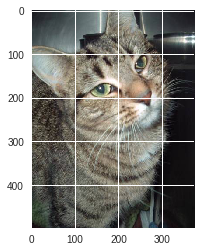

In [16]:
# check out an image
import os

# Just to be safe, reinstall PIL

# .listdir() = Return a list containing names of entries in dir given by path.
files = os.listdir(f'{PATH}valid/cats')[:5] 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [17]:
# check out dimesions of raw image (underlying data that makes up the cat pic)
img.shape

(499, 375, 3)

So,  the above image has 3 dimensions in an array, or a **RANK-3 TENSOR** 

In [18]:
# see 1st 4 rows and cols of the above image
img[:4,:4]

array([[[24, 25, 30],
        [23, 24, 29],
        [22, 23, 28],
        [22, 23, 28]],

       [[23, 24, 29],
        [23, 24, 29],
        [22, 23, 28],
        [22, 23, 28]],

       [[23, 24, 29],
        [23, 24, 29],
        [23, 24, 29],
        [23, 24, 29]],

       [[23, 24, 29],
        [23, 24, 29],
        [23, 24, 29],
        [23, 24, 29]]], dtype=uint8)

Each cells has 3 RGB pixel values. We will attempt to use these pixel values to predict if a picture is a cat or dog.

## 1st model: A Quick Start

Using a *pre-trained* model (created by some one else to solve a different problem) instead of building one from scratch to solve a similar problem. 

Using **resnet34** model, trained on **ImageNet** (1.2M images, 1k classes) as a starting point = a CNN = type of NN that builds state-of-the-art models for CV

(resnet34])[https://github.com/KaimingHe/deep-residual-networks] = a version of the model that won 2015 ImageNet competition. 

Train + evalulate dogs v. cats model in 4 lines of code, under 20 seconds:

In [19]:
arch = resnet34

# 'data' will contain the validation and training data 
#      specify w/ img size from before
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))

# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to .01 (how much to multiply gradient step in GD)
# setting epoch = 2 = looking over entire *validation* set of images 3 times
learn.fit(.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 16129853.91it/s]


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


[0.     0.0506 0.023  0.9927]
[1.     0.0639 0.026  0.9912]
 57%|█████▋    | 206/360 [00:07<00:05, 26.22it/s, loss=0.0451]

[2.     0.0463 0.022  0.9912]



The above prints out  

* `[epoch# value of loss function (cross-entropy loss) for training, value of loss function for validation, accuracy]`

Prior to this competition, state of the art (2013) = 80% accuracy, + competition resulted in a huge jump to 98.9% accuracy via the author of a popular DL library. Extraordinarily, < 4 years later, we can now beat that result in seconds, + even last year in this course, initial model = 98.3% accuracy, nearly double the error just a year later, + that took ~10 minutes to compute.

### Analyzing Results

Can look at overall metrics like above, as well as examples of:

* random correct labels
* random incorrect labels
* most correct labels of each class (highest probability of that're correct)
* most incorrect labels of each class (highest probability of that're incorrect)
* most uncertainlabels (probabilty closest to .5)

In [20]:
# look at labels for validation data (cats = 0, dogs = 1)
print(data.classes,"\n")
print(data.val_y)

['cats', 'dogs'] 

[0 0 0 ... 1 1 1]


In [21]:
# learn.predict() return predictions for validation set (in log-scale)
log_preds = learn.predict()
print(log_preds.shape)

(2000, 2)


In [22]:
# gotten 2000 predictions of probabilities of 2 labels
# look @ 1st 10 predictions in [dog log prob, cat log prob] format
log_preds[:10]

array([[-0.0015, -6.4706],
       [-0.0094, -4.6729],
       [-0.0002, -8.4011],
       [-0.0001, -9.0988],
       [-0.0159, -4.147 ],
       [-0.0001, -8.812 ],
       [-0.0008, -7.1481],
       [-0.0006, -7.376 ],
       [-0.0008, -7.0963],
       [-0.0009, -7.0382]], dtype=float32)

In [0]:
# cobvert probabilities (across cols w/ axis=1) to binary label
preds = np.argmax(log_preds, axis = 1)

# get probability of being a dog and of being a cat
probs_dog = np.exp(log_preds[:,1])
probs_cat = np.exp(log_preds[:,0])

# set probs for plots below as probs_dog
probs = probs_dog

In [24]:
print("label predictions",preds[:5])
print("probability of being a dog",probs_dog[:5])
print("probability of being a cat",probs_cat[:5])

label predictions [0 0 0 0 0]
probability of being a dog [0.0015 0.0093 0.0002 0.0001 0.0158]
probability of being a cat [0.9985 0.9907 0.9998 0.9999 0.9842]


In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,len(ims)//rows, i+1)
    sp.axis('Off')
    
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])
  
# def plot_val_with_title(idxs,title):
#  imgs = np.stack([data.val_ds[x][0] for x in idxs])
#  title_probs = [probs[x] for x in idxs]
#  print(title)
#  return plots(data.val_ds.denorm(imgs), rows=1, title=title_probs)

def load_img_id(ds,idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs,title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


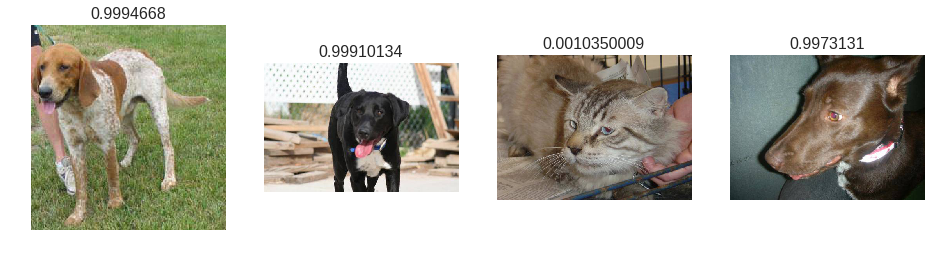

In [27]:
# look at some random correctly labelled images
plot_val_with_title(idxs=rand_by_correct(True),title='Correctly Classified')

Incorrectly Classified


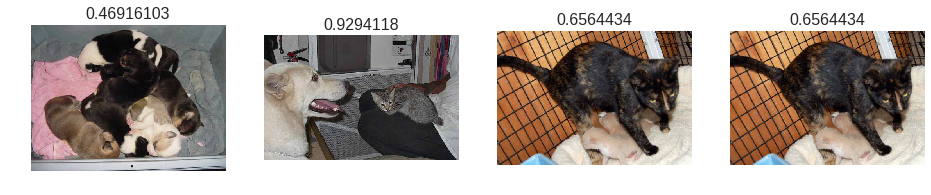

In [28]:
# look at some random incorrectly labelled images
plot_val_with_title(idxs=rand_by_correct(False),title='Incorrectly Classified')

In [0]:
def most_by_mask(mask,mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y,is_correct):
  mult = -1 if (y==1) == is_correct else 1
  return most_by_mask(((preds==data.val_y) == is_correct) & (data.val_y == y), mult)

Most Correct Cats


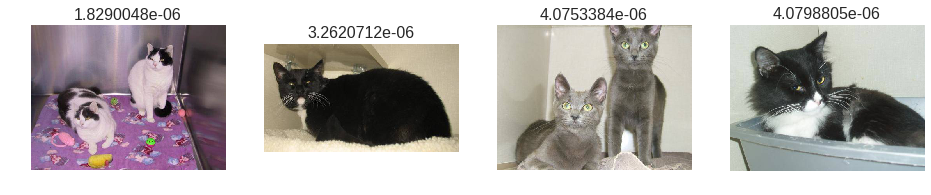

In [30]:
# check which its most confident are cats
plot_val_with_title(most_by_correct(y=0,is_correct=True),'Most Correct Cats')

Most Correct Dogs


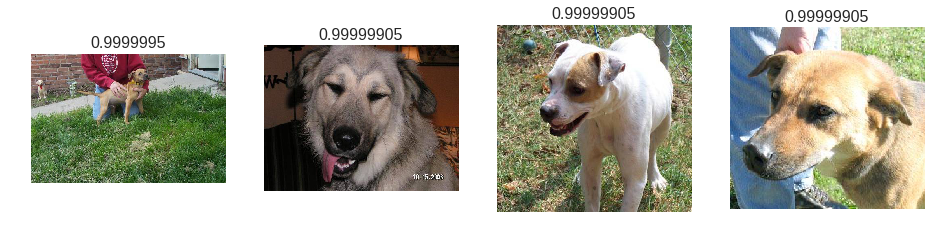

In [31]:
# check which its most confident are dogs
plot_val_with_title(most_by_correct(y=1,is_correct=True),'Most Correct Dogs')

Most Incorrect Cats


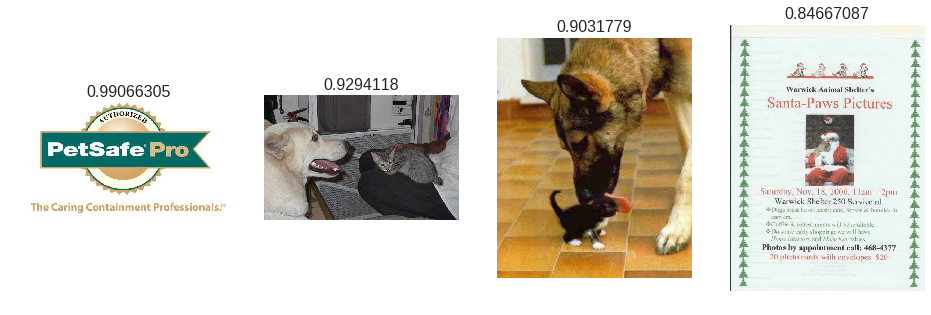

In [32]:
# what it thinks are correct (thinks are dogs but were actually cats)
# i.e. most confident its a dog but its a cat
plot_val_with_title(most_by_correct(y=0,is_correct=False),'Most Incorrect Cats')

Most Incorrect Dogs


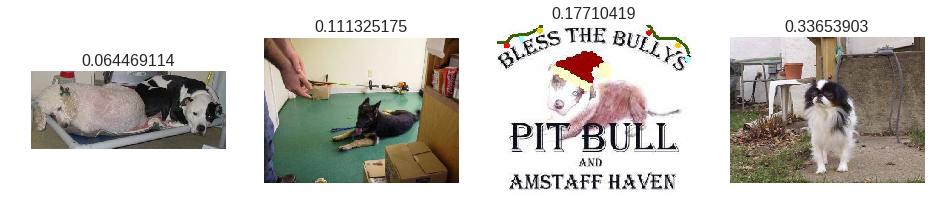

In [33]:
# what it thinks are incorrect (thinks are cats but were actually dogs)
# i.e. most confident its a cat but its a dog
plot_val_with_title(most_by_correct(y=1,is_correct=False),'Most Incorrect Dogs')

Most uncertain about


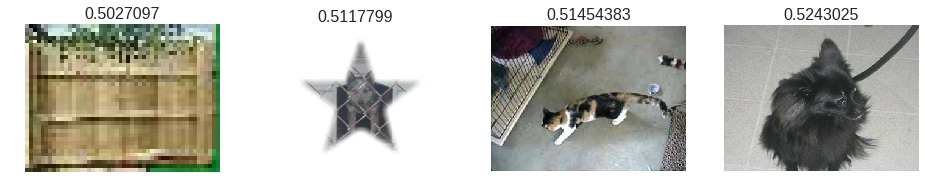

In [34]:
# see which imgs its most uncertain about (probability closest to threshold of .5)
# sort images after subtracting .5 and grab smallest (closes to .5 originally)
most_uncertain = np.argsort(np.abs(probs -.5))[:4]
plot_val_with_title(idxs=most_uncertain,title="Most uncertain about")

We want to look at our data b/c to double check what model is doing well and what it's doing badly (and may need to be fixed), and also to learn things about the data set ( such as what imgs shouldn't be there, like the logos).

One could now grab data (of different things) and put them into a similar dir structure as dogs and cats above and run the same model on it.

### Deep Learning

* from Arthur Samuel's chess-playing software (father of ML)
* traditional ML = difficult and knowledge + time-intensive
* See: Andrew Beck = computational pathologist (CPATH) @ Stanford (now @ Harvard)
  * took pathology slides of cancer, worked w/ many pathologists to figure out what patterns/features were associated w/ long-term survival vs. dying quickly
  * them, programmers wrote algorithms to capture said features that were passed into a logistic regression to predic survival (more accurate than real-life pathologists)
  * this approach took many years of work from domain experts + CS to build
* now much easier w/ DL = contains an **infinitely flexible function**, an **all-purpose parameter fitting** to fit parameters correctly to run the right function that is also **fast and scalable**
* gives a class of functions
* underlying function of FL = **neural network (NN)**  = nonlinear function composed of sums, likelihoods, and S
* NN = consists of a # of simple linear layers interspersed w/ simple non-linear layers
* interspersing supports **universal approximation theorem** = this kind of function can solve any kind of problem to arbitrarily close accuracy as long as enough parameters are added + are added *correctly* (i.e. NN are *proveably* shown to be an infinitely flexible function)
*  all-purpose parameter fitting is done typically via **gradient descent (GD)** = for different parameters, how good are they at solving the problem --> then figure out a slightly better set of parameters + follow the surace of the resulting loss function results downwards until finding the minimum, trying to hit global instead of local minima)
  * turns out, for NN in particular, there aren' actually mult. different local min, just one
  * i.e. there're different parts of the space that're equally good
  * problem = need to do the above in reasonable amt of time
  * GPU's have made this possible (~10x faster than CPU on log scale + are also cheaper)
* Unfortunately, turns out just 1 hidden layer requires exponentially increasing # of params to support universal approximation theorem = *not fast + scalable*
* this is solved via *multiple* hidden layers = super linear scaling (i.e. just a few more hidden layers = multiplicatively more accuracy to  multiplicatively more complex problems)
* this gives rise to **DL** = NN's w/ mult. hidden layers (father = Geoffrey Hinton [Google Brain, 2012])

In our CNN above, the key piece = the **convolution**
* convolution will go over the img pixels via a 3x3 grid to take the pixel w/in the grid + multiplies them by a 3x3 matrix of 9 **kernel values** + adds up the sum
* CNN then trys to find **edges** in the result of these resulting 3x3 matrix multiplication results
* this linear operation can make up a layer in our NN
* then we add a non-linear layer (takes input value + transforms it non-linearly, like sigmoid)
*  Now we typically use a **rectified linear units** (**Rectifier** or **ReLU's**) = take any negative values + replace w/ 0 + leave positive values as-are (`y = max(x,0)` in math terms to do the replacing)
* Key point of combo of linear layer into non-linear function layer = allows us to create arbitrarily complex shapes + combine them together to get to the essence of the universal approximation theorem + why NN's can solve many computable problems

To set these parameters, we use **stochastic (random) GD**
* basic idea = pick random points, move a little bit to some side, find derivative @ that point = direction that's *downward* = the **gradient**
* then move in this direction if its downward (towards the minimum)
* until we reach the minimum
* $x_{n+1} = {x_n} + \frac {dy} {dx}\lambda$
* $\lambda$ = **learning rate** = only want to take a small step in direction of the gradient b/c too large of a step leads to **divergence** not **convergence**
  * but too small = too long to converge
* check out (https://neuralnetworksanddeeplearning.com/chap4.html)

Combination of a convolution, non-linearity layers, + learning SGD = w/ enough kernels/layers, we can actually draw out the original images == i.e. very rich capabilities

This is what the cat vs. dog classifier did above





### Choosing a learning rate

**Learning rate** = how quickly/slowly to update the **weights**/**parameters** = 1 of the most difficult parameters to set, as it significantly affects model performance

Method `learn.lr_find()` from `fastai` library helps find optimal learning rates via a technique developed in [Cyclical Learning Rates for Training Neural Networks (Leslie Smith, 2015)](https://arxiv.org/abs/1506.01186) = keep increasing learning rate from very small value until **loss** stops decreasing (how far prediction is from goal) + then plot learning rate across **batches** to see what it looks like.
* finds at what point during GD we saw best improvement, then use that learning rate
* end up plotting learning rate vs. loss to find best value

1st, create a **learner** b/c we want to know how to set the learning rate for a new (untrained) model


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [36]:
lrf=learn.lr_find()

 85%|████████▍ | 305/360 [00:08<00:01, 35.08it/s, loss=0.482]


See our model was trained again but the model stops @ 84%, before the loss got too bad

`learn` object contains attribute = `sched` = contains our **learning rate scheduler** = has some convienent plotting functionality, such as 

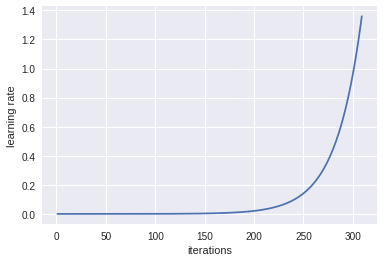

In [37]:
# how learning rate value increases w/ more iterations/minibatch of GD
learn.sched.plot_lr()

See learning rate increases exponentially after some **iteration/min-batch** of SGD 
* w/in each epoch, there's `num_train_samples/num_iterations` minibatches of SGD

Can then look @ learning rate vs. loss to see where loss stop stops decreasing

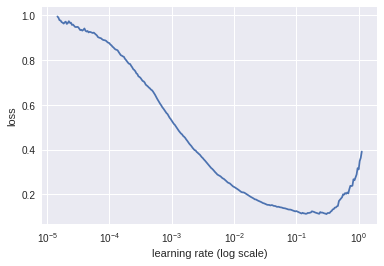

In [38]:
learn.sched.plot()

Want to find the highest possible learning rate such that loss is still decreasing/improving, which looks to be @ about =1e-2 (or 0.01)

So we use .01 in our `learn.fit()` call.

***Note***: Optimal learning rate can change as  model is trained, so you may want to re-run this function from time to time.

**Epoch** = go through the dataset and each time grab (say 64) images + use each of them once to try + improve the model a bit w/ GD
* choice of # of epochs = arbirtrary
* too many = accuracy may start getting worse
* may take too long w/ a large model/lots of data, so we just run enough epochs in time that's available

### Results

`[0.     0.064  0.0254 0.9907]
[1.     0.0511 0.0234 0.9912]
[2.     0.0552 0.0254 0.9893]`

These = our epochs, training loss, validation loss, + accuracy (want low loss, as **log loss = increasing penalties for being inaccurate w/ increasing confidence**)

### Learning Rate

LR = thing that decides how quickly we'll "zoom in" on the correct solution (minimum point of the function via the gradient + its direction = GD)
 * steeper gradient = further away
 
 Then multiply this gradient by the LR
 * too small = takes too long
 * too large = could overstep in that direction + then oscillate back + forth + end up getting further and further away = **divergence** = loss/accuracy going to infinity
 
 LR Finder will, in each iteration, look @ minibatch (some random imgs, 64-128 @ a time generally), use some small LR and then generally increase it w/ each iteration until LR is so big that loss starts getting worse (increasing)
 
 Want to look at that learning rate vs. loss plot + find the smallest LR such that loss is still decreasing 
 
We are **NOT** looking for the minimum = this is where loss is actually not getting better = LR is too high
 
Try looking @ min + going back 1 magnitude, say around `10e-2` above

Right now, this is the only hyperparameter we're tuning, and by playing w/ it = can get pretty good results

Most other hyperparameters are tuned by fastai lib (dozens of 'em and difficult to set)

BTS, fastai is trying to find the *correct GD version using the **[Adam optimization algorithm(https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)**

Most import thing **for \*\*\*\*DL\*\*\*\* algorithms** = more data

Challenge = hundreds of millions of parameters + after being trained for a while on data = overfitting starts (i.e. recognizing patterns specific to training data that're not true underlying patterns and won't generalize to new data)

Easier way to do this rather than collecting more data = ***data augmentation***, which is build into fastai lib

In the initial model code, we passed `tfms=tfms_from_model(arch,sz)` which were the **transforms** for the data (architecture and size), but we can also pass in a **list of specific data augmentation functions** into augment transforms arg = `aug_tfms`, such as `transform_side_on` = used if we have photos taken from the side, so we'd want to flip the horizontally (not vertically), rotate them by *smalll* amnts, + slightly vary brightness + contrast, lightly zoom in + out, etc. to get *slightly* different views of same image = **slightly changing data such that interpretation shouldn't be impacted**
* e.g. most photos of dogs +  cats = take from side so these functions work well for their pics, as opposed to photos taken from the top down like satellite imagery = `transforms_top_down`
* `transforms_side_on` = predefined list of functions
* also enable the random zooming of images up to specified scale of 1.1 via `max_zoom` parameter



In [0]:
# use resnet34 architecure, predefined image size of 224 in `sz`, list of augmentation functions, and max_zoom scale parameter
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

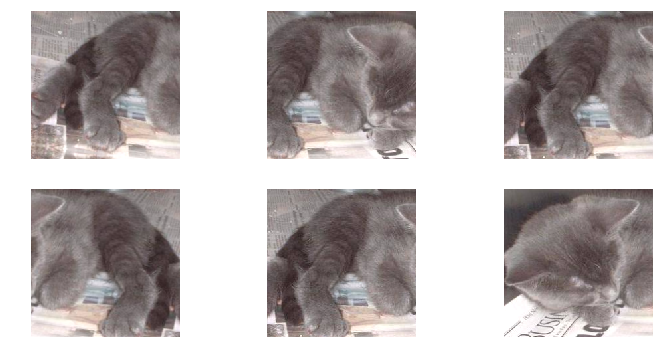

In [42]:
# this builds x different data classes via range(x) of the ***SAME** image
ims = np.stack([get_augs() for i in range(6)])

# plot x different classes of the same image
plots(ims, rows=2)

Doesn't *exactly* create new data, but it's a different way of looking @ things for the CNN + allows it to "learn" to see cats + dogs @ different angles by messing with images but keeping the same image

can now pass in our set of transforms `tfms` into `ImageClassifierData` for a new dataset and the learn on it

In [43]:
arch = resnet34
# use new transforms
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to one from plot above = 1e-2 in 2 epochs
learn.fit(1e-2,2)

[0.     0.0613 0.0353 0.9863]
[1.     0.049  0.0291 0.9917]



*Initially, augmentations don't do anything b/c of `precompute=True`*
* this is b/c layers of the NN have **activations**  (#'s) that say some feature (say eyeball of bird) is in some location w/ some level of confidence (probability)
* we have a *pre-trained* network that is trained to see/recognize certain things (~1.5M imgs in ImageNet dataset)
* can, for every image, take the 2nd-to-last layer (all info necessary to classify something) + **save those activations**
* these are our **precomputed activations**
* idea = when we want to create a new classifier that takes advantage of these precomputed activations to create a simple linear model
* may take a while to compute these (only has to do it once for a dataset, forever)
 
 This prevents our augmentation from working, so we need to turn it off before training



In [45]:
learn.precompute=False
learn.fit(1e-2,3,cycle_len=1)

[0.     0.0347 0.027  0.9912]
[1.     0.0372 0.0259 0.9907]
  0%|          | 0/360 [00:00<?, ?it/s]

[2.     0.037  0.0257 0.9912]



takes longer now

we got 

`[0.     0.0347 0.027  0.9912]
[1.     0.0372 0.0259 0.9907]
[2. 0.037  0.0257 0.9912]`

Good news = training error decreasing
bad = validation isn't so much

BUT we're *not* overfitting (training loss << validation loss b/c doing better on training set)

BUT we're not really improving

idea of `cycle_len=1` = from recent 